# Communication with Spectrumanalyser 8563E
A Harmonic Radar Study

In [10]:
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
# Initialize the VISA resource manager
rm = pyvisa.ResourceManager()
# Find avalable address for active intruments
instrument_id_list = rm.list_resources()
print(instrument_id_list)
analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

('USB0::0x0957::0x1F01::MY48180281::INSTR', 'GPIB0::1::INSTR')


### Connect to the Spectrum Analyzer

In [12]:
def initialize(analyzer_id, generator_id):
    rm = pyvisa.ResourceManager()
    
    analyzer = rm.open_resource(analyzer_id)  
    generator = rm.open_resource(generator_id)  
    
    # Set the data format and trace to acquire
    analyzer.write('IP;TDF P')  # Initialize preset and set data to parameter format
    return analyzer, generator, rm

### Write continious array 

In [5]:
analyzer, generator, rm = initialize(analyzer_id, generator_id)

def get_trace_data():
    
    # Trigger a single sweep and get the trace
    analyzer.write('SNGLS;TS')  # Set to single sweep mode and trigger
    time.sleep(1)               # Wait for the sweep to complete

    # Retrieve trace data from Trace A
    trace_data = analyzer.query('TRA?')  # Query Trace A

    # Parse and convert the data into a list of floats
    trace_values = list(map(float, trace_data.split(',')))

    return trace_values

try:
    while True:
        # Acquire trace data
        data = get_trace_data()
        
        # Process or display data as needed
        print("Acquired Trace A Data:", data)
        
        # Optional: wait before the next acquisition
        time.sleep(1)  # Adjust for your preferred data acquisition interval

except KeyboardInterrupt:
    print("Data acquisition stopped.")

finally:
    # Close the resource
    analyzer.close()
    rm.close()


Acquired Trace A Data: [1.66, -87.66, -64.83, -86.33, -65.83, -87.66, -65.16, -85.16, -66.83, -87.5, -67.5, -86.0, -67.0, -86.33, -67.16, -89.33, -67.16, -85.0, -62.66, -85.66, -66.66, -88.66, -66.16, -85.83, -68.0, -85.5, -66.5, -83.16, -67.33, -86.0, -66.66, -85.33, -66.83, -86.33, -67.0, -88.83, -67.33, -87.16, -67.16, -87.0, -66.16, -84.66, -66.66, -84.16, -66.16, -89.33, -66.16, -86.16, -65.83, -87.33, -66.83, -86.66, -66.83, -86.0, -66.66, -86.5, -66.0, -86.5, -64.5, -84.66, -65.66, -86.16, -65.33, -84.66, -66.5, -65.66, -87.16, -67.83, -85.16, -65.33, -85.5, -66.83, -86.16, -66.16, -85.16, -67.16, -86.16, -67.33, -88.83, -67.0, -85.16, -67.66, -86.16, -67.33, -84.83, -67.0, -89.5, -67.83, -85.16, -67.16, -87.33, -67.0, -86.66, -66.66, -87.16, -67.83, -89.5, -67.5, -84.0, -66.5, -86.5, -67.33, -88.33, -66.83, -86.33, -67.33, -85.16, -66.5, -90.33, -68.0, -87.16, -66.66, -86.16, -65.83, -86.66, -67.33, -87.66, -67.83, -87.5, -67.66, -85.5, -67.16, -86.33, -67.83, -87.83, -67.0, -8

### Single Graph Generation  

C:\Users\mkm\AppData\Local\Temp\ipykernel_22004\2876102204.py:57: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, blit=True, interval=sweep_time)  # Update to match sweep time


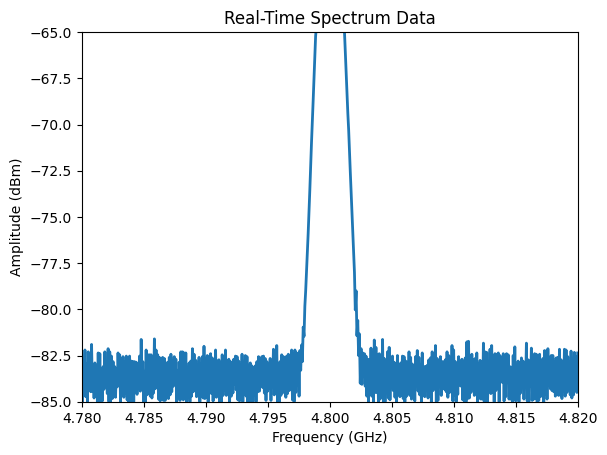

In [9]:
# initialiate instument at given address
analyzer, generator, rm = initialize(analyzer_id, generator_id)

# Parameters for the measurement configuration
start_freq = 4.78  # Start frequency in GHz
stop_freq = 4.82   # Stop frequency in GHz
sweep_time = 50   # Sweep time in milliseconds
rbw = '1MHZ'      # Resolution Bandwidth
vbw = '10KHZ'     # Video Bandwidth
log_scale = '2DB' # Logarithmic scale in dB per division
reference_level = -65  # Reference Level in dBm
reference_level_low = reference_level - int('2DB'.replace('DB', '')) * 10  # Lower reference Level in dBm


# Configure the analyzer with parameters
analyzer.write('IP;TDF P')                        # Initialize preset and set data to parameter format
analyzer.write(f'FA {start_freq}GHZ')             # Set start frequency
analyzer.write(f'FB {stop_freq}GHZ')              # Set stop frequency
analyzer.write(f'RB {rbw}')                       # Set Resolution Bandwidth
analyzer.write(f'VB {vbw}')                       # Set Video Bandwidth
analyzer.write(f'ST {sweep_time}MS')              # Set Sweep Time
analyzer.write(f'LG {log_scale}')                 # Set Log Scale
analyzer.write(f'RL {reference_level}DBM')        # Set Reference Level to -60 dBm

def get_trace_data():
    """
    Function to acquire trace A data continuously.
    """
    analyzer.write('SNGLS;TS')                    # Set to single sweep mode and trigger
    time.sleep(sweep_time / 1000)                 # Wait for the sweep to complete (converted to seconds)

    # Retrieve trace data from Trace A
    trace_data = analyzer.query('TRA?')
    trace_values = list(map(float, trace_data.split(',')))

    return trace_values

# Frequency axis based on start/stop settings
freqs = np.linspace(start_freq, stop_freq, num=601)  # Assuming 601 points between start and stop frequency

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot(freqs, np.zeros_like(freqs), lw=2)
ax.set_ylim(reference_level_low, reference_level)  # Adjust display limits to match reference level setting
ax.set_xlim(start_freq, stop_freq)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Amplitude (dBm)')
ax.set_title('Real-Time Spectrum Data')

def update(frame):
    # Update the plot with new trace data
    data = get_trace_data()
    line.set_ydata(data)
    return line,

# Use FuncAnimation for continuous updates
ani = FuncAnimation(fig, update, blit=True, interval=sweep_time)  # Update to match sweep time

plt.show()

# Close the analyzer connection when done
analyzer.close()
rm.close()


# Continuous reading  

C:\Users\mkm\AppData\Local\Temp\ipykernel_5464\3883284980.py:65: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = FuncAnimation(self.fig, self.update, blit=True, interval=100)  # Reduced interval for faster updates


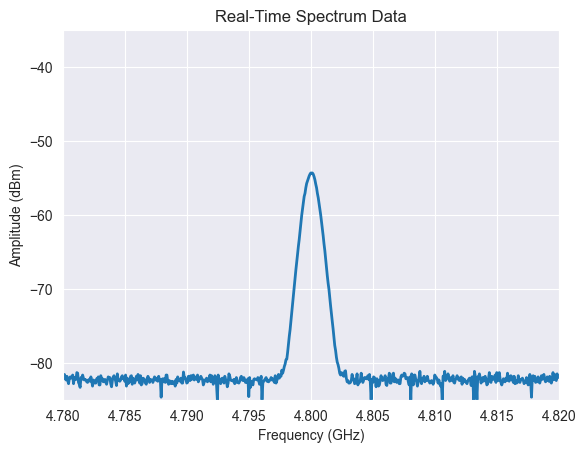

In [13]:
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Parameters for the measurement configuration
start_freq = 4.78   # Start frequency in GHz
stop_freq = 4.82    # Stop frequency in GHz
sweep_time = 20     # Sweep time in milliseconds (reduce for faster updates)
rbw = '1MHZ'        # Resolution Bandwidth
vbw = '10KHZ'       # Video Bandwidth
log_scale = 5       # Logarithmic scale in dB per division
reference_level = -35  # Reference Level in dBm
reference_level_low = reference_level - log_scale * 10  # Calculate lower reference level

analyzer, generator, rm = initialize(analyzer_id, generator_id)

# Configure the analyzer with parameters
analyzer.write(f'FA {start_freq}GHZ')             # Set start frequency
analyzer.write(f'FB {stop_freq}GHZ')              # Set stop frequency
analyzer.write(f'RB {rbw}')                       # Set Resolution Bandwidth
analyzer.write(f'VB {vbw}')                       # Set Video Bandwidth
analyzer.write(f'ST {sweep_time}MS')              # Set Sweep Time
analyzer.write(f'LG {log_scale}DB')               # Set Log Scale
analyzer.write(f'RL {reference_level}DBM')        # Set Reference Level

def get_trace_data():
    """
    Acquires trace A data from the spectrum analyzer.
    """
    analyzer.write('SNGLS;TS')                    # Set to single sweep mode and trigger
    time.sleep(sweep_time / 1000)                 # Wait for the sweep to complete

    # Retrieve trace data from Trace A
    trace_data = analyzer.query('TRA?')
    trace_values = list(map(float, trace_data.split(',')))
    return trace_values

# Frequency axis based on start/stop settings
freqs = np.linspace(start_freq, stop_freq, num=601)  # Assuming 601 points between start and stop frequency

# Set up the Tkinter application
class SpectrumAnalyzerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Live Spectrum Analyzer Data")

        # Create a Matplotlib figure for live plotting
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot(freqs, np.zeros_like(freqs), lw=2)
        self.ax.set_ylim(reference_level_low, reference_level)  # Adjust display limits to match reference level
        self.ax.set_xlim(start_freq, stop_freq)
        self.ax.set_xlabel('Frequency (GHz)')
        self.ax.set_ylabel('Amplitude (dBm)')
        self.ax.set_title('Real-Time Spectrum Data')

        # Embed the Matplotlib figure in Tkinter
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Start the animation
        self.ani = FuncAnimation(self.fig, self.update, blit=True, interval=100)  # Reduced interval for faster updates

    def update(self, frame):
        """
        Update function for live plot.
        """
        # Get new data and update the plot
        data = get_trace_data()
        self.line.set_ydata(data)
        self.canvas.draw()  # Redraw the canvas to show updated data
        return self.line,

    def on_close(self):
        # Properly close the connection to the analyzer on exit
        analyzer.close()
        rm.close()
        self.root.destroy()

# Start the Tkinter application
root = tk.Tk()
app = SpectrumAnalyzerApp(root)
root.protocol("WM_DELETE_WINDOW", app.on_close)  # Ensure resources are closed on exit
root.mainloop()


# Single messurement - Peak & noise floor

Without Target - Harmonic Peak: -52.33 dBm at 4.8000 GHz
With Target    - Harmonic Peak: -33.83 dBm at 4.7999 GHz
Difference (No Target - With Target): -18.50 dB


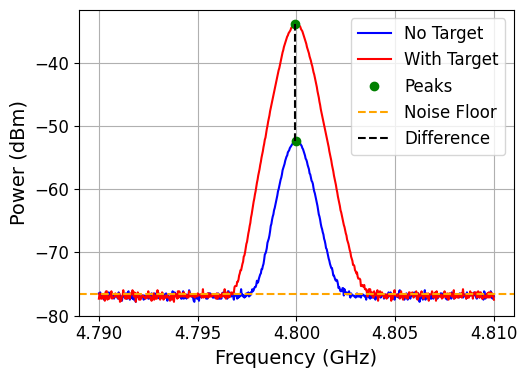

In [294]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
fundamental_freq = 2.4  # GHz
harmonic_multiplier = 2
harmonic_freq = fundamental_freq * harmonic_multiplier

power_level = 16  # dBm
sweep_time = 50  # ms
log_scale = 10  # dB per division
noise_floor_offset = 90  # dB above the noise floor for RL
span = 0.02  # GHz total span
rbw_final = '1MHZ'
vbw_final = '10KHZ'

analyzer_id = 'GPIB0::1::INSTR'      # Replace with your analyzer address
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'  # Replace with your generator address


def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    """
    Measure the noise floor around a given frequency with specified parameters.
    Returns the noise_floor and the trace data.
    """
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep(sweep_time_ms / 1000.0 + 0.05)  # Wait for sweep to complete

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor, trace_values

def set_reference_level(analyzer, reference_level):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

def measure_peak_power(analyzer, center_freq, span, rbw, vbw, sweep_time_ms):
    """
    Measure the spectrum around center_freq with given RBW, VBW, span, and sweep time.
    Return the trace frequencies, values, peak frequency, and peak value.
    """
    analyzer.write(f'FA {center_freq - span/2}GHZ')
    analyzer.write(f'FB {center_freq + span/2}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep(sweep_time_ms / 1000.0 + 0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    
    num_points = len(trace_values)
    frequencies = np.linspace(center_freq - span/2, center_freq + span/2, num_points)
    
    peak_power = np.max(trace_values)
    peak_index = np.argmax(trace_values)
    peak_frequency = frequencies[peak_index]

    return frequencies, trace_values, peak_frequency, peak_power


# ================================
# Main Measurement Flow
# ================================
analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
generator = initialize_generator(generator_id)

# Turn on the generator at the fundamental frequency
generator.write(f'FREQ {fundamental_freq}GHZ')
generator.write(f'POW {power_level}DBM')
generator.write('OUTP ON')
time.sleep(0.1)

# STEP 1: Measure initial noise floor with narrow RBW to estimate RL
initial_noise_floor, _ = measure_noise_floor(analyzer, harmonic_freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time)
reference_level = initial_noise_floor + noise_floor_offset
set_reference_level(analyzer, reference_level)

# STEP 2: Measure second harmonic peak without target
freqs_harm_no_target, values_harm_no_target, harm_peak_freq_no_target, harm_peak_power_no_target = measure_peak_power(
    analyzer, harmonic_freq, span, rbw_final, vbw_final, sweep_time
)

# Prompt user to place target and press enter
input("Place the target in front of the antenna, then press Enter to take a new measurement...")

# STEP 3: Measure second harmonic peak with target in place
freqs_harm_with_target, values_harm_with_target, harm_peak_freq_with_target, harm_peak_power_with_target = measure_peak_power(
    analyzer, harmonic_freq, span, rbw_final, vbw_final, sweep_time
)

# Turn off the generator
generator.write('OUTP OFF')

# ================================
# Results and Comparison
# ================================
trace_data = analyzer.query('TRA?')
trace_values = np.array(list(map(float, trace_data.split(','))))
final_noise_floor = np.median(trace_values)

power_difference = harm_peak_power_no_target - harm_peak_power_with_target
print(f"Without Target - Harmonic Peak: {harm_peak_power_no_target:.2f} dBm at {harm_peak_freq_no_target:.4f} GHz")
print(f"With Target    - Harmonic Peak: {harm_peak_power_with_target:.2f} dBm at {harm_peak_freq_with_target:.4f} GHz")
print(f"Difference (No Target - With Target): {power_difference:.2f} dB")

# Plot both spectra for comparison
plt.figure(figsize=(5.5, 4))

plt.plot(freqs_harm_no_target, values_harm_no_target, label='No Target', color='blue')
plt.plot(freqs_harm_with_target, values_harm_with_target, label='With Target', color='red')

plt.plot(harm_peak_freq_no_target, harm_peak_power_no_target, 'go', label = 'Peaks')
plt.plot(harm_peak_freq_with_target, harm_peak_power_with_target, 'go',)
plt.axhline(y=final_noise_floor, color='orange', linestyle='--', label='Noise Floor')


plt.xlabel("Frequency (GHz)")
plt.ylabel("Power (dBm)")
plt.grid(True)

# Compute midpoint frequency
mid_freq = (harm_peak_freq_no_target + harm_peak_freq_with_target) / 2.0

# Draw a vertical line only between the two peak power levels
ymin = min(harm_peak_power_no_target, harm_peak_power_with_target)
ymax = max(harm_peak_power_no_target, harm_peak_power_with_target)
plt.plot([mid_freq, mid_freq], [ymin, ymax], 'k--', label='Difference')
plt.legend()

plt.tight_layout()
plt.show()


## Compared to fundemental frequnecy 

In [ ]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
fundamental_freq = 2.4  # GHz
harmonic_multiplier = 2
harmonic_freq = fundamental_freq * harmonic_multiplier

power_level = 16  # dBm
sweep_time = 50  # ms
log_scale = 10   # dB per division
noise_floor_offset = 90  # dB above the noise floor for RL
span = 0.02  # GHz total span
rbw_final = '1MHZ'
vbw_final = '10KHZ'

analyzer_id = 'GPIB0::1::INSTR'  # Replace with your analyzer address
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'  # Replace with your generator address

def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    """
    Measure the noise floor around a given frequency with specified parameters.
    Returns the noise_floor and the trace data.
    """
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep(sweep_time_ms / 1000.0 + 0.05)  # Wait for sweep to complete

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor, trace_values

def set_reference_level(analyzer, reference_level):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

def measure_peak_power(analyzer, center_freq, span, rbw, vbw, sweep_time_ms):
    """
    Measure the spectrum around center_freq with given RBW, VBW, span, and sweep time.
    Return the trace frequencies, values, peak frequency, and peak value.
    """
    analyzer.write(f'FA {center_freq - span / 2}GHZ')
    analyzer.write(f'FB {center_freq + span / 2}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep(sweep_time_ms / 1000.0 + 0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))

    num_points = len(trace_values)
    frequencies = np.linspace(center_freq - span / 2, center_freq + span / 2, num_points)

    peak_power = np.max(trace_values)
    peak_index = np.argmax(trace_values)
    peak_frequency = frequencies[peak_index]

    return frequencies, trace_values, peak_frequency, peak_power


# ================================
# Main Measurement Flow
# ================================
analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
generator = initialize_generator(generator_id)

# Turn on the generator at the fundamental frequency
generator.write(f'FREQ {fundamental_freq}GHZ')
generator.write(f'POW {power_level}DBM')
generator.write('OUTP ON')
time.sleep(0.1)

# STEP 1: Measure initial noise floor with narrow RBW at the harmonic frequency
initial_noise_floor, _ = measure_noise_floor(
    analyzer, harmonic_freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time
)
reference_level = initial_noise_floor + noise_floor_offset
set_reference_level(analyzer, reference_level)

# STEP 2a: Measure fundamental peak without target
freqs_fund_no_target, values_fund_no_target, fund_peak_freq_no_target, fund_peak_power_no_target = measure_peak_power(
    analyzer, fundamental_freq, span, rbw_final, vbw_final, sweep_time
)

# STEP 2b: Measure second harmonic peak without target
freqs_harm_no_target, values_harm_no_target, harm_peak_freq_no_target, harm_peak_power_no_target = measure_peak_power(
    analyzer, harmonic_freq, span, rbw_final, vbw_final, sweep_time
)

# Prompt user to place target and press enter
input("Place the target in front of the antenna, then press Enter to take a new measurement...")

# STEP 3a: Measure fundamental peak with target
freqs_fund_with_target, values_fund_with_target, fund_peak_freq_with_target, fund_peak_power_with_target = measure_peak_power(
    analyzer, fundamental_freq, span, rbw_final, vbw_final, sweep_time
)

# STEP 3b: Measure second harmonic peak with target
freqs_harm_with_target, values_harm_with_target, harm_peak_freq_with_target, harm_peak_power_with_target = measure_peak_power(
    analyzer, harmonic_freq, span, rbw_final, vbw_final, sweep_time
)

# Turn off the generator
generator.write('OUTP OFF')

# Measure the final noise floor (optional)
trace_data = analyzer.query('TRA?')
trace_values = np.array(list(map(float, trace_data.split(','))))
final_noise_floor = np.median(trace_values)

In [ ]:

# ================================
# SAVE Data to Disk
# ================================
np.savez(
    "measurement_data.npz",
    freqs_fund_no_target=freqs_fund_no_target,
    values_fund_no_target=values_fund_no_target,
    fund_peak_freq_no_target=fund_peak_freq_no_target,
    fund_peak_power_no_target=fund_peak_power_no_target,

    freqs_harm_no_target=freqs_harm_no_target,
    values_harm_no_target=values_harm_no_target,
    harm_peak_freq_no_target=harm_peak_freq_no_target,
    harm_peak_power_no_target=harm_peak_power_no_target,

    freqs_fund_with_target=freqs_fund_with_target,
    values_fund_with_target=values_fund_with_target,
    fund_peak_freq_with_target=fund_peak_freq_with_target,
    fund_peak_power_with_target=fund_peak_power_with_target,

    freqs_harm_with_target=freqs_harm_with_target,
    values_harm_with_target=values_harm_with_target,
    harm_peak_freq_with_target=harm_peak_freq_with_target,
    harm_peak_power_with_target=harm_peak_power_with_target,

    final_noise_floor=final_noise_floor
)

# ================================
# LOAD Data from Disk (for Analysis & Plotting)
# ================================
data = np.load("measurement_data.npz")

freqs_fund_no_target           = data["freqs_fund_no_target"]
values_fund_no_target          = data["values_fund_no_target"]
fund_peak_freq_no_target       = data["fund_peak_freq_no_target"]
fund_peak_power_no_target      = data["fund_peak_power_no_target"]

freqs_harm_no_target           = data["freqs_harm_no_target"]
values_harm_no_target          = data["values_harm_no_target"]
harm_peak_freq_no_target       = data["harm_peak_freq_no_target"]
harm_peak_power_no_target      = data["harm_peak_power_no_target"]

freqs_fund_with_target         = data["freqs_fund_with_target"]
values_fund_with_target        = data["values_fund_with_target"]
fund_peak_freq_with_target     = data["fund_peak_freq_with_target"]
fund_peak_power_with_target    = data["fund_peak_power_with_target"]

freqs_harm_with_target         = data["freqs_harm_with_target"]
values_harm_with_target        = data["values_harm_with_target"]
harm_peak_freq_with_target     = data["harm_peak_freq_with_target"]
harm_peak_power_with_target    = data["harm_peak_power_with_target"]

final_noise_floor              = data["final_noise_floor"]

----- Harmonic Measurements -----
Without Target - Harmonic Peak: -51.99 dBm at 4.7999 GHz
With Target    - Harmonic Peak: -34.32 dBm at 4.8000 GHz
Difference (No Target - With Target): -17.67 dB

----- Fundamental Measurements -----
Without Target - Fundamental Peak: -40.16 dBm at 2.3999 GHz
With Target    - Fundamental Peak: -38.32 dBm at 2.4000 GHz
Difference (No Target - With Target): -1.84 dB


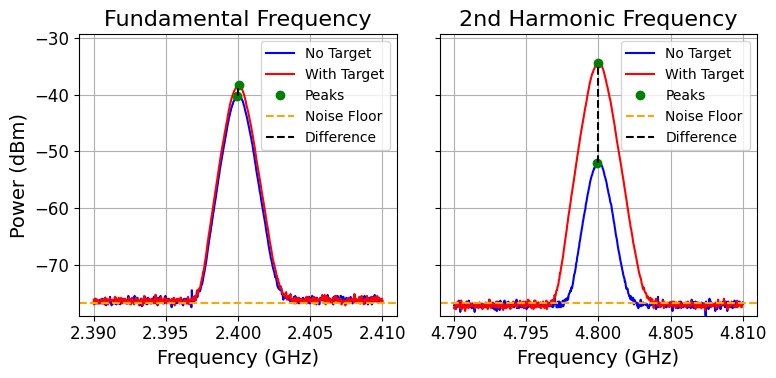

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Results and Comparison
# ================================
harm_power_difference = harm_peak_power_no_target - harm_peak_power_with_target
fund_power_difference = fund_peak_power_no_target - fund_peak_power_with_target

print("----- Harmonic Measurements -----")
print(f"Without Target - Harmonic Peak: {harm_peak_power_no_target:.2f} dBm at {harm_peak_freq_no_target:.4f} GHz")
print(f"With Target    - Harmonic Peak: {harm_peak_power_with_target:.2f} dBm at {harm_peak_freq_with_target:.4f} GHz")
print(f"Difference (No Target - With Target): {harm_power_difference:.2f} dB")

print("\n----- Fundamental Measurements -----")
print(f"Without Target - Fundamental Peak: {fund_peak_power_no_target:.2f} dBm at {fund_peak_freq_no_target:.4f} GHz")
print(f"With Target    - Fundamental Peak: {fund_peak_power_with_target:.2f} dBm at {fund_peak_freq_with_target:.4f} GHz")
print(f"Difference (No Target - With Target): {fund_power_difference:.2f} dB")

# ================================
# Plotting (Using LOADED Data)
# ================================

# ---- Increase global font size settings ----
plt.rcParams.update({
    'font.size': 14,           # Global font size
    'axes.titlesize': 16,      # Axes title font size
    'axes.labelsize': 14,      # Axes label font size
    'legend.fontsize': 12,     # Legend font size
    'xtick.labelsize': 12,     # X tick label font size
    'ytick.labelsize': 12      # Y tick label font size
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# -- Fundamental Plot --
ax1.plot(freqs_fund_no_target, values_fund_no_target, label='No Target', color='blue')
ax1.plot(freqs_fund_with_target, values_fund_with_target, label='With Target', color='red')

ax1.plot(fund_peak_freq_no_target, fund_peak_power_no_target, 'go', label='Peaks')
ax1.plot(fund_peak_freq_with_target, fund_peak_power_with_target, 'go')
ax1.axhline(y=final_noise_floor, color='orange', linestyle='--', label='Noise Floor')

ax1.set_title("Fundamental Frequency", fontsize=16)     # Title font size
ax1.set_xlabel("Frequency (GHz)", fontsize=14)          # X-label font size
ax1.set_ylabel("Power (dBm)", fontsize=14)              # Y-label font size
ax1.grid(True)

# Make the tick labels bigger
ax1.tick_params(axis='both', labelsize=12) 

# Draw a vertical line to visualize difference between fundamental peaks
fund_mid_freq = (fund_peak_freq_no_target + fund_peak_freq_with_target) / 2.0
fund_ymin = min(fund_peak_power_no_target, fund_peak_power_with_target)
fund_ymax = max(fund_peak_power_no_target, fund_peak_power_with_target)
ax1.plot([fund_mid_freq, fund_mid_freq], [fund_ymin, fund_ymax], 'k--', label='Difference')

ax1.legend(fontsize=10)

# -- Harmonic Plot --
ax2.plot(freqs_harm_no_target, values_harm_no_target, label='No Target', color='blue')
ax2.plot(freqs_harm_with_target, values_harm_with_target, label='With Target', color='red')

ax2.plot(harm_peak_freq_no_target, harm_peak_power_no_target, 'go', label='Peaks')
ax2.plot(harm_peak_freq_with_target, harm_peak_power_with_target, 'go')
ax2.axhline(y=final_noise_floor, color='orange', linestyle='--', label='Noise Floor')

ax2.set_title("2nd Harmonic Frequency", fontsize=16)    
ax2.set_xlabel("Frequency (GHz)", fontsize=14)
ax2.grid(True)

# Make the tick labels bigger
ax2.tick_params(axis='both', labelsize=12)

# Draw a vertical line to visualize difference between harmonic peaks
harm_mid_freq = (harm_peak_freq_no_target + harm_peak_freq_with_target) / 2.0
harm_ymin = min(harm_peak_power_no_target, harm_peak_power_with_target)
harm_ymax = max(harm_peak_power_no_target, harm_peak_power_with_target)
ax2.plot([harm_mid_freq, harm_mid_freq], [harm_ymin, harm_ymax], 'k--', label='Difference')

# Remove numeric labels on y-axis for the 2nd subplot, if desired
ax2.tick_params(axis='y', labelleft=False)
ax2.set_ylabel('')  # remove text label
ax2.legend(fontsize=10)

# ================================
# Make the Y-axis the same for BOTH subplots
# ================================
all_y_values = np.concatenate([
    values_fund_no_target,
    values_fund_with_target,
    values_harm_no_target,
    values_harm_with_target,
    [
        fund_peak_power_no_target, fund_peak_power_with_target,
        harm_peak_power_no_target, harm_peak_power_with_target,
        final_noise_floor
    ]
])

ymin = np.min(all_y_values)
ymax = np.max(all_y_values) + 5

ax1.set_ylim([ymin, ymax])
ax2.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()


In [263]:
# 1) Convert dBm to watts
#    Power(dBm) -> Power(W) = 10 ^ ((dBm - 30) / 10)
def dBm_to_W(power_dBm):
    return 10 ** ((power_dBm - 30) / 10.0)

# 2) Convert each peak power to watts
fund_no_target_W     = dBm_to_W(fund_peak_power_no_target)
fund_with_target_W   = dBm_to_W(fund_peak_power_with_target)
harm_no_target_W     = dBm_to_W(harm_peak_power_no_target)
harm_with_target_W   = dBm_to_W(harm_peak_power_with_target)

# 3) Calculate the absolute difference (peak-to-peak) in watts
fundamental_diff_W = abs(fund_no_target_W - fund_with_target_W)
harmonic_diff_W    = abs(harm_no_target_W - harm_with_target_W)

print("----- Fundamental (Peak-to-Peak) Difference in Watts -----")
print(f"No Target: {fund_no_target_W:.6e} W")
print(f"With Target: {fund_with_target_W:.6e} W")
print(f"Difference: {fundamental_diff_W:.6e} W\n")

print("----- Harmonic (Peak-to-Peak) Difference in Watts -----")
print(f"No Target: {harm_no_target_W:.6e} W")
print(f"With Target: {harm_with_target_W:.6e} W")
print(f"Difference: {harmonic_diff_W:.6e} W\n")

print(f"Difference ratio: {harmonic_diff_W/fundamental_diff_W:.2e} ")

----- Fundamental (Peak-to-Peak) Difference in Watts -----
No Target: 9.638290e-08 W
With Target: 1.472313e-07 W
Difference: 5.084835e-08 W

----- Harmonic (Peak-to-Peak) Difference in Watts -----
No Target: 6.324119e-09 W
With Target: 3.698282e-07 W
Difference: 3.635041e-07 W

The Harmonic peak-to-peak difference in power (in W) is larger than the Fundamental difference.



# Sweeping to find optimal frequnecy 

## Comparason with and without target

## With standard diviation

In [24]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

# Measurement parameters
start_freq = 2.2  # GHz
stop_freq = 2.8   # GHz
num_points = 101
power_level = 16  # dBm
sweep_time = 50   # ms
log_scale = 10    # dB per division
noise_floor_offset = 90  # dB above noise floor for RL
harmonic_multiplier = 2
num_averages = 5  # Number of measurements per frequency for averaging and std

def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def adjust_reference_level(analyzer, freq):
    analyzer.write(f'FA {freq - 0.02}GHZ')  # Center around harmonic frequency
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write('RB 10KHZ')              # Narrow RBW for noise floor detection
    analyzer.write('VB 1KHZ')               # Narrow VBW for better accuracy
    analyzer.write(f'ST {sweep_time}MS')    # Set sweep time
    
    analyzer.write('SNGLS;TS')              # Single sweep and trigger
    time.sleep(0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    reference_level = noise_floor + noise_floor_offset
    
    analyzer.write(f'LG {log_scale}DB')         
    analyzer.write(f'RL {reference_level}DBM')
    
    return reference_level

def perform_sweep(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_averages):
    frequencies = np.linspace(start_freq, stop_freq, num_points)
    means = []
    stds = []
    
    for freq in frequencies:
        # Set the generator to desired frequency and power
        generator.write(f'FREQ {freq}GHZ')
        generator.write(f'POW {power_level}DBM')
        generator.write('OUTP ON')
        time.sleep(0.1)
        
        harmonic_freq = freq * harmonic_multiplier
        
        # Adjust reference level based on noise floor
        adjust_reference_level(analyzer, harmonic_freq)
        
        # Prepare the analyzer for measurement
        analyzer.write(f'FA {harmonic_freq - 0.02}GHZ')
        analyzer.write(f'FB {harmonic_freq + 0.02}GHZ')
        analyzer.write('RB 1MHZ')
        analyzer.write('VB 10KHZ')
        analyzer.write(f'ST {sweep_time}MS')
        
        # Perform multiple measurements for averaging
        peak_measurements = []
        for _ in range(num_averages):
            analyzer.write('SNGLS;TS')
            time.sleep(0.05)
            
            trace_data = analyzer.query('TRA?')
            trace_values = np.array(list(map(float, trace_data.split(','))))
            peak_power = np.max(trace_values)
            peak_measurements.append(peak_power)
        
        mean_val = np.mean(peak_measurements)
        std_val = np.std(peak_measurements)
        
        means.append(mean_val)
        stds.append(std_val)
    
    generator.write('OUTP OFF')
    
    return frequencies, np.array(means), np.array(stds)

def compare_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_averages):
    # Without target
    frequencies, means_without, stds_without = perform_sweep(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_averages)
    
    # Prompt to place target
    input("Place the target and press Enter to continue...")
    # With target
    _, means_with, stds_with = perform_sweep(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_averages)
    
    differences = means_with - means_without
    # For difference std, you can approximate by sqrt(std1^2 + std2^2) if independent measurements
    differences_std = np.sqrt(stds_with**2 + stds_without**2)
    
    return frequencies, means_without, stds_without, means_with, stds_with, differences, differences_std

# Replace these with your actual instrument addresses
analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
generator = initialize_generator(generator_id)

frequencies, means_without, stds_without, means_with, stds_with, differences, differences_std = compare_sweeps(
    analyzer, generator, start_freq, stop_freq, num_points, power_level, num_averages
)

ValueError: 'x' and 'y' must have the same size

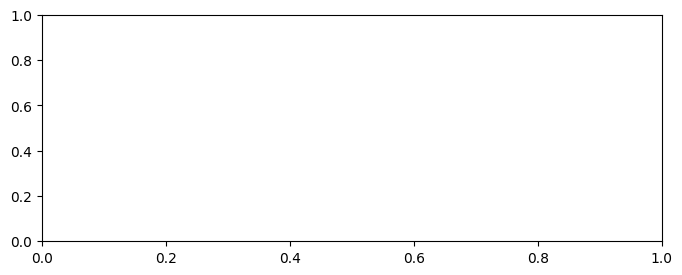

In [37]:

# Plotting
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.errorbar(frequencies, means_without, fmt='-', color='blue', ecolor='lightblue', capsize=3)
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Peak Power (dBm)")
plt.title("Second Harmonic Peak Power (Without Target)")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.errorbar(frequencies, means_with, fmt='-', color='green', ecolor='lightgreen', capsize=3)
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Peak Power (dBm)")
plt.title("Second Harmonic Peak Power (With Target)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.errorbar(frequencies, differences, fmt='-', color='red', ecolor='pink', capsize=3)
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Difference in Peak Power (dB)")
plt.title("Difference in Second Harmonic Peak Power (With - Without)")
plt.grid(True)

plt.tight_layout()
plt.show()

analyzer.close()
analyzer_rm.close()
generator.close()


## 5 seperate messuremetns to visualize spread

In [221]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# File to save/load data
data_filename = "sweep_opt_freq4.npz"

# Set to True to run measurement, False to load from file
run_measurement = True

# Measurement parameters
start_freq = 2.2  # GHz
stop_freq = 2.8  # GHz
num_points = 101
power_level = 16  # dBm
sweep_time = 50  # ms
log_scale = 10  # dB per division
noise_floor_offset = 90  # dB above noise floor for RL
harmonic_multiplier = 2
num_sweeps = 5  # Number of full sweeps (each sweep covers all frequencies)


def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm


def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator


def measure_noise_floor(analyzer, freq):
    """
    Measure the noise floor at a given harmonic frequency and
    return the reference level to be used for all sweeps.
    """
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write('RB 10KHZ')  # Narrow RBW for noise floor detection
    analyzer.write('VB 1KHZ')  # Narrow VBW for better accuracy
    analyzer.write(f'ST {sweep_time}MS')  # Set sweep time

    analyzer.write('SNGLS;TS')  # Single sweep and trigger
    time.sleep(0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    reference_level = noise_floor + noise_floor_offset

    # Set the analyzer to the determined reference level and log scale
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

    return reference_level


def perform_single_sweep(analyzer, generator, frequencies, power_level, reference_level):
    """
    Perform a single sweep across all frequencies. For each frequency:
    - Set generator frequency and power
    - Use previously determined reference level
    - Measure the peak harmonic power
    Returns an array of measured peak powers (one per frequency).
    """
    measurements = []
    for freq in frequencies:
        # Set the generator to desired frequency and power
        generator.write(f'FREQ {freq}GHZ')
        generator.write(f'POW {power_level}DBM')
        generator.write('OUTP ON')
        time.sleep(0.1)

        harmonic_freq = freq * harmonic_multiplier

        # Prepare the analyzer for measurement using the known reference level
        # (We assume reference_level is already set globally on the analyzer)
        analyzer.write(f'FA {harmonic_freq - 0.02}GHZ')
        analyzer.write(f'FB {harmonic_freq + 0.02}GHZ')
        analyzer.write('RB 1MHZ')
        analyzer.write('VB 10KHZ')
        analyzer.write(f'ST {sweep_time}MS')

        analyzer.write('SNGLS;TS')
        time.sleep(0.05)

        trace_data = analyzer.query('TRA?')
        trace_values = np.array(list(map(float, trace_data.split(','))))
        peak_power = np.max(trace_values)
        measurements.append(peak_power)

    return np.array(measurements)


def perform_multiple_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps):
    frequencies = np.linspace(start_freq, stop_freq, num_points)

    # Measure the noise floor once at the start of the experiment
    # Here we pick the first frequency to determine harmonic frequency,
    # you may choose a different representative frequency if needed.
    representative_freq = frequencies[0] * harmonic_multiplier
    reference_level = measure_noise_floor(analyzer, representative_freq)

    # Now perform all sweeps using the fixed reference level
    all_sweeps = []
    for _ in range(num_sweeps):
        sweep_data = perform_single_sweep(analyzer, generator, frequencies, power_level, reference_level)
        all_sweeps.append(sweep_data)
    generator.write('OUTP OFF')
    return frequencies, np.array(all_sweeps)


def compare_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps):
    # Without target
    frequencies, sweeps_without = perform_multiple_sweeps(analyzer, generator, start_freq, stop_freq, num_points,
                                                          power_level, num_sweeps)

    # Prompt to place target
    input("Place the target and press Enter to continue...")

    # With target
    _, sweeps_with = perform_multiple_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level,
                                             num_sweeps)

    # Sort each frequency column-wise
    sorted_without = np.sort(sweeps_without, axis=0)  # shape (num_sweeps x num_points)
    sorted_with = np.sort(sweeps_with, axis=0)  # shape (num_sweeps x num_points)

    # Differences line-by-line
    differences = sorted_with - sorted_without

    return frequencies, sorted_without, sorted_with, differences


# Main code
if run_measurement:
    # Replace these with your actual instrument addresses
    analyzer_id = 'GPIB0::1::INSTR'
    generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    frequencies, sorted_without, sorted_with, differences = compare_sweeps(
        analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps
    )

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()
    
    # Save the data
    np.savez(data_filename, frequencies=frequencies, sorted_without=sorted_without,
             sorted_with=sorted_with, differences=differences)
    print(f"Data saved to {data_filename}")
else:
    # Load the data
    if os.path.exists(data_filename):
        data = np.load(data_filename)
        frequencies = data['frequencies']
        sorted_without = data['sorted_without']
        sorted_with = data['sorted_with']
        differences = data['differences']
        print(f"Data loaded from {data_filename}")
    else:
        raise FileNotFoundError(f"No data file found at {data_filename}. Please run the measurement first.")

Data saved to sweep_opt_freq4.npz


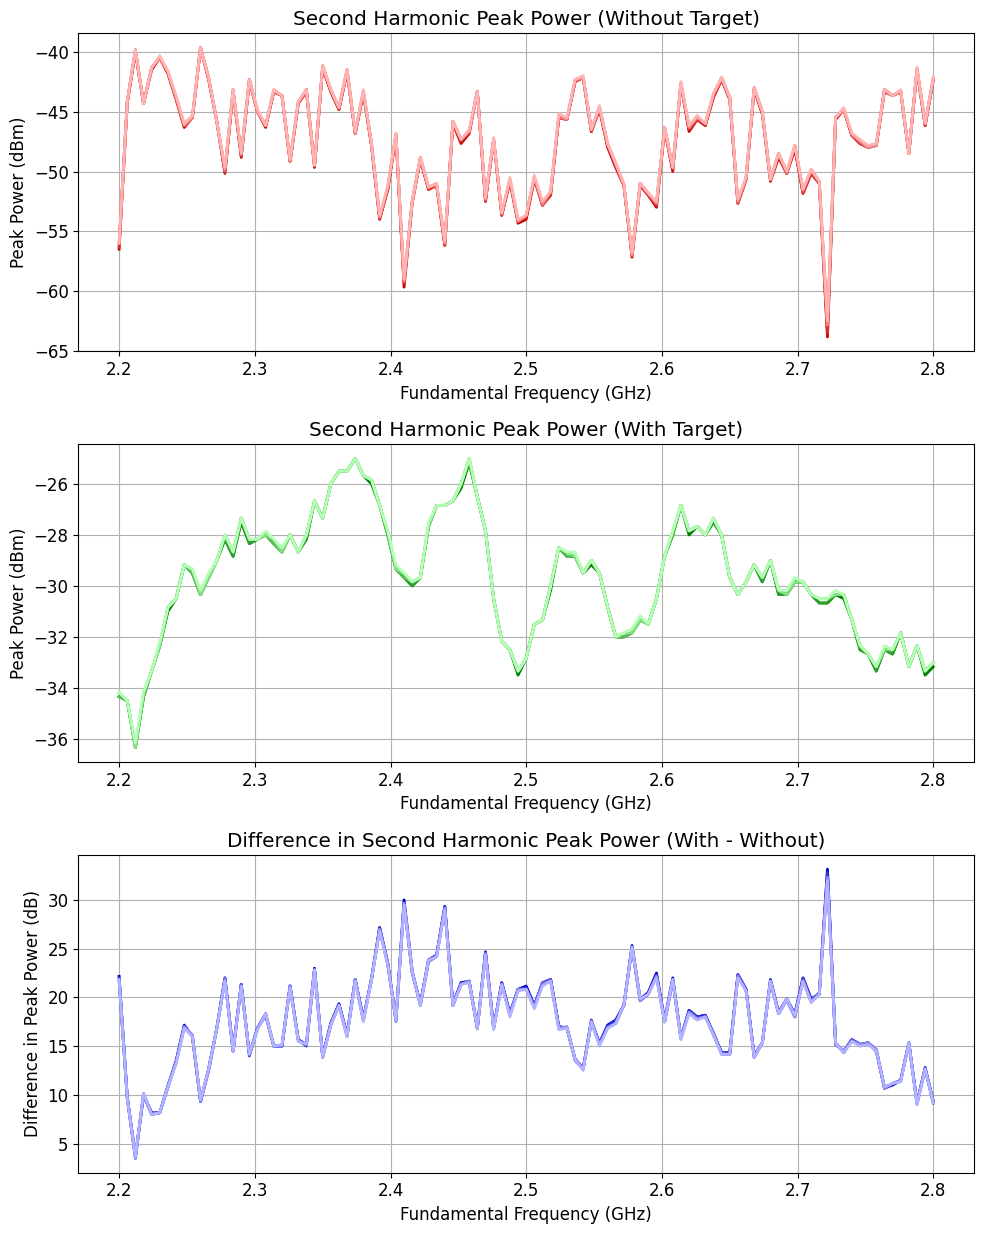

In [222]:

# Plotting
plt.figure(figsize=(10, 12.5))

# Define colors for the lines
# We will create a colormap that goes from dark green to light green for without and with target.
# For example, dark green as (0, 0.5, 0), light green as (0.7, 1, 0.7)
# We'll interpolate 5 steps between these.
green_start = np.array([0, 0.5, 0])
green_end = np.array([0.7, 1, 0.7])
greens = [green_start + (green_end - green_start) * i / (num_sweeps - 1) for i in range(num_sweeps)]

# For difference, we can do a red colormap:
red_start = np.array([0.8, 0, 0])
red_end = np.array([1, 0.7, 0.7])
reds = [red_start + (red_end - red_start) * i / (num_sweeps - 1) for i in range(num_sweeps)]

# For difference, we can do a blue colormap:
blue_start = np.array([0, 0, 0.8])
blue_end = np.array([0.7, 0.7, 1])
blues = [blue_start + (blue_end - blue_start) * i / (num_sweeps - 1) for i in range(num_sweeps)]

# 1) Without Target
plt.subplot(3, 1, 1)
for i in range(num_sweeps):
    plt.plot(frequencies, sorted_without[i, :], color=reds[i])
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Peak Power (dBm)")
plt.title("Second Harmonic Peak Power (Without Target)")
plt.grid(True)

# 2) With Target
plt.subplot(3, 1, 2)
for i in range(num_sweeps):
    plt.plot(frequencies, sorted_with[i, :], color=greens[i])
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Peak Power (dBm)")
plt.title("Second Harmonic Peak Power (With Target)")
plt.grid(True)

# 3) Differences (With - Without)
plt.subplot(3, 1, 3)
for i in range(num_sweeps):
    plt.plot(frequencies, differences[i, :], color=blues[i])
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Difference in Peak Power (dB)")
plt.title("Difference in Second Harmonic Peak Power (With - Without)")
plt.grid(True)

plt.tight_layout()
plt.show()

analyzer.close()
analyzer_rm.close()
generator.close()



## With fundemental

In [298]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# File to save/load data
data_filename = "sweep_opt_freq_7.npz"

# Set to True to run measurement, False to load from file
run_measurement = False

# Measurement parameters
start_freq = 2.2  # GHz (fundamental start)
stop_freq = 2.8   # GHz (fundamental stop)
num_points = 101
power_level = 16  # dBm
sweep_time = 50   # ms
log_scale = 10    # dB per division
noise_floor_offset = 90  # dB above noise floor for RL
harmonic_multiplier = 2
num_sweeps = 5     # Number of full sweeps (each sweep covers all frequencies)

# Instrument IDs (replace with your actual addresses)
analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'


def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm


def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator


def measure_noise_floor(analyzer, freq):
    """
    Measure the noise floor at a given harmonic frequency and
    return the reference level to be used for all sweeps.
    """
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write('RB 10KHZ')  # Narrow RBW for noise floor detection
    analyzer.write('VB 1KHZ')   # Narrow VBW for better accuracy
    analyzer.write(f'ST {sweep_time}MS')  # Set sweep time

    analyzer.write('SNGLS;TS')  # Single sweep and trigger
    time.sleep(sweep_time / 1000.0 + 0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    reference_level = noise_floor + noise_floor_offset

    # Set the analyzer to the determined reference level and log scale
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

    return reference_level


def measure_peak(analyzer, center_freq, span=0.04, rbw='1MHZ', vbw='10KHZ', sweep_time_ms=50):
    """
    Measure the peak power around center_freq using given bandwidths, span, and sweep time.
    Returns the peak power (dBm).
    """
    analyzer.write(f'FA {center_freq - span/2}GHZ')
    analyzer.write(f'FB {center_freq + span/2}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep(sweep_time_ms / 1000.0 + 0.05)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    peak_power = np.max(trace_values)
    return peak_power


def perform_single_sweep(analyzer, generator, frequencies, power_level, reference_level):
    """
    Perform a single sweep across all frequencies. For each frequency:
    - Set generator frequency and power
    - Measure both the fundamental and harmonic peak powers
    Returns two arrays of measured peak powers (fundamental and harmonic).
    """
    fund_measurements = []
    harm_measurements = []

    for freq in frequencies:
        # Set the generator to desired frequency and power
        generator.write(f'FREQ {freq}GHZ')
        generator.write(f'POW {power_level}DBM')
        generator.write('OUTP ON')
        time.sleep(0.1)

        harmonic_freq = freq * harmonic_multiplier

        # Measure fundamental peak
        fund_peak_power = measure_peak(analyzer, freq, span=0.04, rbw='1MHZ', vbw='10KHZ', sweep_time_ms=sweep_time)

        # Measure harmonic peak
        harm_peak_power = measure_peak(analyzer, harmonic_freq, span=0.04, rbw='1MHZ', vbw='10KHZ', sweep_time_ms=sweep_time)

        fund_measurements.append(fund_peak_power)
        harm_measurements.append(harm_peak_power)

    return np.array(fund_measurements), np.array(harm_measurements)


def perform_multiple_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps):
    frequencies = np.linspace(start_freq, stop_freq, num_points)

    # Measure the noise floor once at a representative harmonic frequency
    representative_freq = frequencies[0] * harmonic_multiplier
    reference_level = measure_noise_floor(analyzer, representative_freq)

    all_fund_sweeps = []
    all_harm_sweeps = []

    for _ in range(num_sweeps):
        fund_data, harm_data = perform_single_sweep(analyzer, generator, frequencies, power_level, reference_level)
        all_fund_sweeps.append(fund_data)
        all_harm_sweeps.append(harm_data)

    generator.write('OUTP OFF')
    return frequencies, np.array(all_fund_sweeps), np.array(all_harm_sweeps)


def compare_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps):
    # Without target
    frequencies, fund_without, harm_without = perform_multiple_sweeps(
        analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps
    )

    # Prompt to place target
    input("Place the target and press Enter to continue...")

    # With target
    _, fund_with, harm_with = perform_multiple_sweeps(
        analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps
    )

    # Sort sweeps
    # Sorting ensures a defined order for plotting multiple sweeps
    fund_without_sorted = np.sort(fund_without, axis=0)
    harm_without_sorted = np.sort(harm_without, axis=0)
    fund_with_sorted = np.sort(fund_with, axis=0)
    harm_with_sorted = np.sort(harm_with, axis=0)

    # Differences
    fund_diff = fund_with_sorted - fund_without_sorted
    harm_diff = harm_with_sorted - harm_without_sorted

    return frequencies, fund_without_sorted, harm_without_sorted, fund_with_sorted, harm_with_sorted, fund_diff, harm_diff


if run_measurement:
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    (frequencies,
     fund_without_sorted,
     harm_without_sorted,
     fund_with_sorted,
     harm_with_sorted,
     fund_diff,
     harm_diff) = compare_sweeps(analyzer, generator, start_freq, stop_freq, num_points, power_level, num_sweeps)

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()

    # Save the data
    np.savez(data_filename,
             frequencies=frequencies,
             fund_without_sorted=fund_without_sorted,
             harm_without_sorted=harm_without_sorted,
             fund_with_sorted=fund_with_sorted,
             harm_with_sorted=harm_with_sorted,
             fund_diff=fund_diff,
             harm_diff=harm_diff)
    print(f"Data saved to {data_filename}")
else:
    # Load the data
    if os.path.exists(data_filename):
        data = np.load(data_filename)
        frequencies = data['frequencies']
        fund_without_sorted = data['fund_without_sorted']
        harm_without_sorted = data['harm_without_sorted']
        fund_with_sorted = data['fund_with_sorted']
        harm_with_sorted = data['harm_with_sorted']
        fund_diff = data['fund_diff']
        harm_diff = data['harm_diff']
        print(f"Data loaded from {data_filename}")
    else:
        raise FileNotFoundError(f"No data file found at {data_filename}. Please run the measurement first.")


Data saved to sweep_opt_freq_6.npz


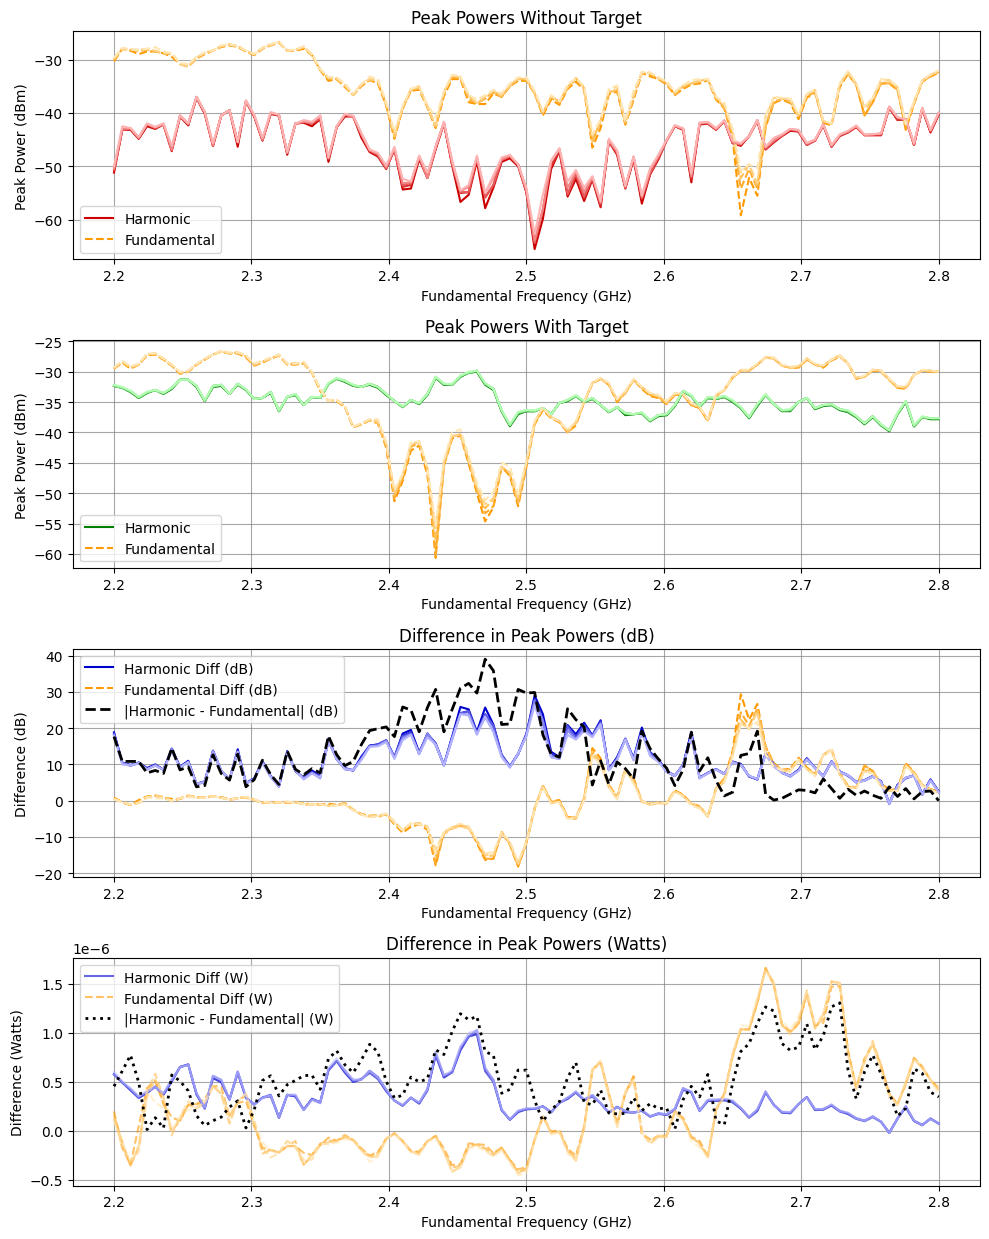

In [301]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure we're using the default style
plt.style.use('default')

# -------------------------
# Example: dBm -> W
# -------------------------
def dBm_to_W(dBm_array):
    """
    Convert an array (or scalar) from dBm to Watts.
    Formula: P(W) = 10^((P(dBm) - 30) / 10)
    """
    return 10 ** ((dBm_array - 30) / 10.0)


num_sweeps = harm_without_sorted.shape[0]

# -----------------------------------------------------
# Compute Differences in W
# -----------------------------------------------------
harm_diff_watts = np.zeros_like(harm_diff)  
fund_diff_watts = np.zeros_like(fund_diff)  

for i in range(num_sweeps):
    # Convert each row from dBm -> W
    harm_with_W     = dBm_to_W(harm_with_sorted[i, :])
    harm_without_W  = dBm_to_W(harm_without_sorted[i, :])
    fund_with_W     = dBm_to_W(fund_with_sorted[i, :])
    fund_without_W  = dBm_to_W(fund_without_sorted[i, :])

    # Subtract in linear scale
    harm_diff_watts[i, :] = harm_with_W - harm_without_W
    fund_diff_watts[i, :] = fund_with_W - fund_without_W

# -----------------------------------------------------
# Start Plotting
# -----------------------------------------------------
plt.figure(figsize=(10, 12.5), facecolor='white')

def interpolate_colormap(start_color, end_color, n):
    return [
        start_color + (end_color - start_color)*i/(n-1)
        for i in range(n)
    ]

# Colormaps for sweeping colors
reds = interpolate_colormap(np.array([0.8, 0.0, 0.0]), np.array([1.0, 0.7, 0.7]), num_sweeps)
greens = interpolate_colormap(np.array([0.0, 0.5, 0.0]), np.array([0.7, 1.0, 0.7]), num_sweeps)
blues = interpolate_colormap(np.array([0.0, 0.0, 0.8]), np.array([0.7, 0.7, 1.0]), num_sweeps)
oranges = interpolate_colormap(np.array([1.0, 0.6, 0.0]), np.array([1.0, 0.9, 0.7]), num_sweeps)

# -----------------------------------------------------
# 1) Without Target (subplot 1)
# -----------------------------------------------------
ax1 = plt.subplot(4, 1, 1)
ax1.set_facecolor('white')

for i in range(num_sweeps):
    # Harmonic (solid)
    if i == 0:
        ax1.plot(frequencies, harm_without_sorted[i, :], color=reds[i], label='Harmonic')
    else:
        ax1.plot(frequencies, harm_without_sorted[i, :], color=reds[i])
    
    # Fundamental (dotted)
    if i == 0:
        ax1.plot(frequencies, fund_without_sorted[i, :], color=oranges[i], linestyle='--', label='Fundamental')
    else:
        ax1.plot(frequencies, fund_without_sorted[i, :], color=oranges[i], linestyle='--')

ax1.set_xlabel("Fundamental Frequency (GHz)")
ax1.set_ylabel("Peak Power (dBm)")
ax1.set_title("Peak Powers Without Target")
ax1.grid(True, linestyle='-', color='gray', alpha=0.7)
ax1.legend()

# -----------------------------------------------------
# 2) With Target (subplot 2)
# -----------------------------------------------------
ax2 = plt.subplot(4, 1, 2)
ax2.set_facecolor('white')

for i in range(num_sweeps):
    # Harmonic (solid)
    if i == 0:
        ax2.plot(frequencies, harm_with_sorted[i, :], color=greens[i], label='Harmonic')
    else:
        ax2.plot(frequencies, harm_with_sorted[i, :], color=greens[i])
    
    # Fundamental (dotted)
    if i == 0:
        ax2.plot(frequencies, fund_with_sorted[i, :], color=oranges[i], linestyle='--', label='Fundamental')
    else:
        ax2.plot(frequencies, fund_with_sorted[i, :], color=oranges[i], linestyle='--')

ax2.set_xlabel("Fundamental Frequency (GHz)")
ax2.set_ylabel("Peak Power (dBm)")
ax2.set_title("Peak Powers With Target")
ax2.grid(True, linestyle='-', color='gray', alpha=0.7)
ax2.legend()

# -----------------------------------------------------
# 3) Differences in dB (subplot 3)
# -----------------------------------------------------
ax3 = plt.subplot(4, 1, 3)
ax3.set_facecolor('white')

for i in range(num_sweeps):
    # Harmonic difference (solid)
    if i == 0:
        ax3.plot(frequencies, harm_diff[i, :], color=blues[i], label='Harmonic Diff (dB)')
    else:
        ax3.plot(frequencies, harm_diff[i, :], color=blues[i])
    
    # Fundamental difference (dotted)
    if i == 0:
        ax3.plot(frequencies, fund_diff[i, :], color=oranges[i], linestyle='--', label='Fundamental Diff (dB)')
    else:
        ax3.plot(frequencies, fund_diff[i, :], color=oranges[i], linestyle='--')

# Example "linearity measure" in dB
mid_sweep_index = num_sweeps // 2
harm_minus_fund_dB = abs(fund_diff[mid_sweep_index, :] - harm_diff[mid_sweep_index, :])
ax3.plot(frequencies, harm_minus_fund_dB, 'k--', linewidth=2, label='|Harmonic - Fundamental| (dB)')

ax3.set_xlabel("Fundamental Frequency (GHz)")
ax3.set_ylabel("Difference (dB)")
ax3.set_title("Difference in Peak Powers (dB)")
ax3.grid(True, linestyle='-', color='gray', alpha=0.7)
ax3.legend(loc='upper left')

# -----------------------------------------------------
# 4) Differences in W (subplot 4)
# -----------------------------------------------------
ax4 = plt.subplot(4, 1, 4, sharex=ax3)
ax4.set_facecolor('white')

for i in range(num_sweeps):
    # Harmonic difference in W (solid lines)
    if i == 0:
        ax4.plot(frequencies, harm_diff_watts[i, :], color=blues[i], alpha=0.6, label='Harmonic Diff (W)')
    else:
        ax4.plot(frequencies, harm_diff_watts[i, :], color=blues[i], alpha=0.6)
    
    # Fundamental difference in W (dotted lines)
    if i == 0:
        ax4.plot(frequencies, fund_diff_watts[i, :], color=oranges[i], linestyle='--', alpha=0.6, label='Fundamental Diff (W)')
    else:
        ax4.plot(frequencies, fund_diff_watts[i, :], color=oranges[i], linestyle='--', alpha=0.6)

# Example "linearity measure" in W
harm_with_mid_W = dBm_to_W(harm_with_sorted[mid_sweep_index, :])
harm_without_mid_W = dBm_to_W(harm_without_sorted[mid_sweep_index, :])
fund_with_mid_W = dBm_to_W(fund_with_sorted[mid_sweep_index, :])
fund_without_mid_W = dBm_to_W(fund_without_sorted[mid_sweep_index, :])

harm_diff_mid_W = harm_with_mid_W - harm_without_mid_W
fund_diff_mid_W = fund_with_mid_W - fund_without_mid_W
harm_minus_fund_W = abs(harm_diff_mid_W - fund_diff_mid_W)
ax4.plot(frequencies, harm_minus_fund_W, 'k:', linewidth=2, label='|Harmonic - Fundamental| (W)')

ax4.set_xlabel("Fundamental Frequency (GHz)")
ax4.set_ylabel("Difference (Watts)")
ax4.set_title("Difference in Peak Powers (Watts)")
ax4.grid(True, linestyle='-', color='gray', alpha=0.7)
ax4.legend(loc='upper left')

# Optionally, use a log scale for Watt differences:
# ax4.set_yscale("log")

plt.tight_layout()
plt.show()


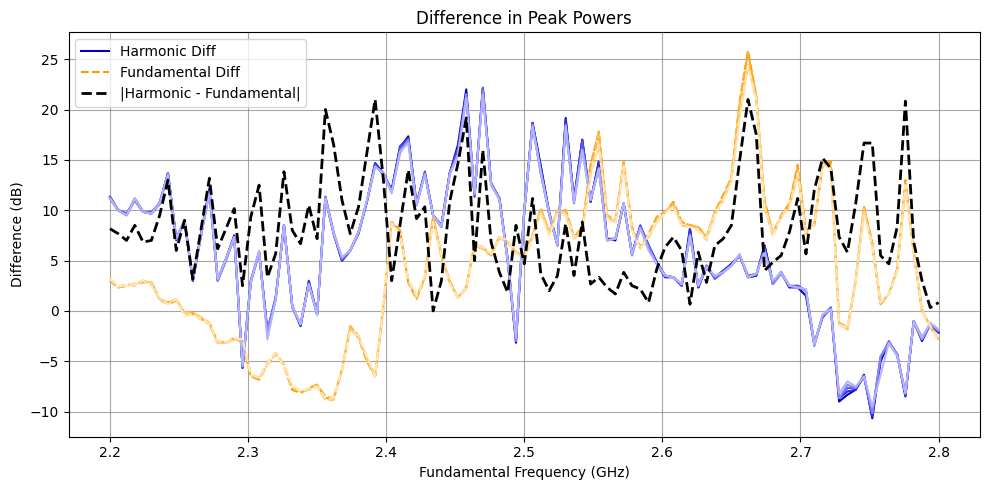

In [74]:
plt.figure(figsize=(10, 5), facecolor='white')

def interpolate_colormap(start_color, end_color, n):
    return [start_color + (end_color - start_color)*i/(n-1) for i in range(n)]

num_sweeps = fund_without_sorted.shape[0]

# Colors
reds = interpolate_colormap(np.array([0.8,0,0]), np.array([1,0.7,0.7]), num_sweeps)
greens = interpolate_colormap(np.array([0,0.5,0]), np.array([0.7,1,0.7]), num_sweeps)
blues = interpolate_colormap(np.array([0,0,0.8]), np.array([0.7,0.7,1]), num_sweeps)
oranges = interpolate_colormap(np.array([1.0,0.6,0.0]), np.array([1.0,0.9,0.7]), num_sweeps)


# 3) Differences (With - Without)

for i in range(num_sweeps):
    # Harmonic difference (solid)
    if i == 0:
        plt.plot(frequencies, harm_diff[i, :], color=blues[i], label='Harmonic Diff')
    else:
        plt.plot(frequencies, harm_diff[i, :], color=blues[i])
    # Fundamental difference (dotted)
    if i == 0:
        plt.plot(frequencies, fund_diff[i, :], color=oranges[i], linestyle='--', label='Fundamental Diff')
    else:
        plt.plot(frequencies, fund_diff[i, :], color=oranges[i], linestyle='--')

# Measure of linearity
mid_sweep_index = num_sweeps // 2
harm_with_mid = harm_with_sorted[mid_sweep_index, :]
fund_with_mid = fund_with_sorted[mid_sweep_index, :]
harm_minus_fund = abs(fund_diff[mid_sweep_index, :] - harm_diff[mid_sweep_index, :])
plt.plot(frequencies, harm_minus_fund, 'k--', linewidth=2, label='|Harmonic - Fundamental|')

plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Difference (dB)")
plt.title("Difference in Peak Powers")
plt.grid(True, linestyle='-', color='gray', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure we're using the default style
plt.style.use('default')

# -------------------------
# Example: dBm -> W
# -------------------------
def dBm_to_W(dBm_array):
    """
    Convert an array (or scalar) from dBm to Watts.
    Formula: P(W) = 10^((P(dBm) - 30) / 10)
    """
    return 10 ** ((dBm_array - 30) / 10.0)

num_sweeps = harm_without_sorted.shape[0]

# -----------------------------------------------------
# Compute Differences in W
# -----------------------------------------------------
harm_diff_watts = np.zeros_like(harm_without_sorted)  
fund_diff_watts = np.zeros_like(fund_without_sorted)  

for i in range(num_sweeps):
    # Convert each row from dBm -> W
    harm_with_W     = dBm_to_W(harm_with_sorted[i, :])
    harm_without_W  = dBm_to_W(harm_without_sorted[i, :])
    fund_with_W     = dBm_to_W(fund_with_sorted[i, :])
    fund_without_W  = dBm_to_W(fund_without_sorted[i, :])

    # Subtract in linear scale
    harm_diff_watts[i, :] = harm_with_W - harm_without_W
    fund_diff_watts[i, :] = fund_with_W - fund_without_W

# -----------------------------------------------------
# Plot Differences in W
# -----------------------------------------------------
plt.figure(figsize=(5, 3), facecolor='white')

# Plot Harmonic difference in W
for i in range(num_sweeps):
    if i == 0:
        plt.plot(frequencies, harm_diff_watts[i, :], color='blue', alpha=0.6, label='2nd Harmonic $\Delta$')
    else:
        plt.plot(frequencies, harm_diff_watts[i, :], color='blue', alpha=0.6)

# Plot Fundamental difference in W
for i in range(num_sweeps):
    if i == 0:
        plt.plot(frequencies, fund_diff_watts[i, :], color='orange',  alpha=0.6, label='Fundamental $\Delta$')
    else:
        plt.plot(frequencies, fund_diff_watts[i, :], color='orange',  alpha=0.6)

# Example "linearity measure" in W
mid_sweep_index = num_sweeps // 2
harm_with_mid_W = dBm_to_W(harm_with_sorted[mid_sweep_index, :])
harm_without_mid_W = dBm_to_W(harm_without_sorted[mid_sweep_index, :])
fund_with_mid_W = dBm_to_W(fund_with_sorted[mid_sweep_index, :])
fund_without_mid_W = dBm_to_W(fund_without_sorted[mid_sweep_index, :])

harm_diff_mid_W = harm_with_mid_W - harm_without_mid_W
fund_diff_mid_W = fund_with_mid_W - fund_without_mid_W
harm_minus_fund_W = abs(harm_diff_mid_W - fund_diff_mid_W)
#plt.plot(frequencies, harm_minus_fund_W, 'k:', linewidth=2, label='|Harmonic - Fundamental| (W)')

# Label axes and add grid/legend
plt.xlabel("Fundamental Frequency (GHz)")
plt.ylabel("Difference (W)")
plt.grid(True, linestyle='-', color='gray', alpha=0.7)
plt.legend(loc='upper left')

# Optionally, use a log scale for Watt differences:
# plt.yscale("log")

plt.tight_layout()
plt.show()


# Multiple target messurement to compare

In [129]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

# ---- User Configurable Parameters ----
fundamental_freq = 2.4  # GHz
harmonic_multiplier = 2
power_level = 16  # dBm
sweep_time = 50   # ms
log_scale = 10    # dB per division
noise_floor_offset = 90  # dB above the noise floor for RL
span = 0.04  # GHz total span around the harmonic frequency
num_measurements_per_target = 5  # How many times we measure per target

analyzer_id = 'GPIB0::1::INSTR'  # Replace with your analyzer address
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'  # Replace with your generator address
# -------------------------------------

harmonic_freq = fundamental_freq * harmonic_multiplier

def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')
    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms/1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor, trace_values

def set_reference_level(analyzer, reference_level, log_scale=10):
    analyzer.write(f'LG {log_scale}DB')         
    analyzer.write(f'RL {reference_level}DBM')

def perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=50, span=0.04):
    # Set generator
    generator.write(f'FREQ {fundamental_freq}GHZ')
    generator.write(f'POW {power_level}DBM')
    generator.write('OUTP ON')
    time.sleep(0.1)

    # Step 1: Measure initial noise floor and set RL
    initial_noise_floor, _ = measure_noise_floor(analyzer, harmonic_freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time_ms)
    reference_level = initial_noise_floor + noise_floor_offset
    set_reference_level(analyzer, reference_level, log_scale=log_scale)

    # Step 2: Measure final spectrum with desired parameters
    analyzer.write(f'FA {harmonic_freq - span/2}GHZ')
    analyzer.write(f'FB {harmonic_freq + span/2}GHZ')
    analyzer.write('RB 1MHZ')
    analyzer.write('VB 10KHZ')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms/1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))

    # Turn off generator after measurement
    generator.write('OUTP OFF')

    # Frequency axis (if needed)
    num_points = len(trace_values)
    start_freq = harmonic_freq - span/2
    stop_freq = harmonic_freq + span/2
    frequencies = np.linspace(start_freq, stop_freq, num_points)

    # Find peak
    peak_power = np.max(trace_values)

    return peak_power, frequencies, trace_values

if __name__ == "__main__":
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    measurements = {}  # Dictionary to store results: {target_name: (mean_peak, std_peak)}

    # First measurement: reference (no target)
    print("Performing reference measurement (no target)...")
    peak_powers = []
    for i in range(num_measurements_per_target):
        peak_power, freqs, vals = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=sweep_time, span=span)
        peak_powers.append(peak_power)
        print(f"Reference measurement {i+1}/{num_measurements_per_target}: {peak_power:.2f} dBm")
    reference_mean = np.mean(peak_powers)
    reference_std = np.std(peak_powers)
    measurements["reference"] = (reference_mean, reference_std)
    print(f"Reference mean peak: {reference_mean:.2f} dBm, std: {reference_std:.2f} dB\n")

    # Subsequent measurements for targets
    while True:
        target_name = input("Enter target name (or 'abort' to finish): ").strip()
        if target_name.lower() == 'abort':
            break
        if target_name == '':
            print("Please enter a valid target name or 'abort'.")
            continue

        # Measure the target multiple times
        print(f"Measuring target '{target_name}'...")
        peak_powers = []
        for i in range(num_measurements_per_target):
            peak_power, freqs, vals = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=sweep_time, span=span)
            peak_powers.append(peak_power)
            print(f"Measurement {i+1}/{num_measurements_per_target}: {peak_power:.2f} dBm")

        mean_peak = np.mean(peak_powers)
        std_peak = np.std(peak_powers)
        measurements[target_name] = (mean_peak, std_peak)
        print(f"'{target_name}' mean peak: {mean_peak:.2f} dBm, std: {std_peak:.2f} dB\n")

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()

    # Now compute differences from reference and plot
    # We'll skip 'reference' in the plotting, only plot targets
    target_names = [t for t in measurements.keys() if t != 'reference']
    diffs = []
    errs = []
    for t in target_names:
        mean_peak, std_peak = measurements[t]
        # Difference from reference (target_mean - reference_mean)
        diff = mean_peak - reference_mean
        # Combine standard deviations if needed, but here we'll just show target std
        # since reference std might not be too relevant for difference plotting.
        # If you want to combine them, diff_std = sqrt(std_peak^2 + reference_std^2)
        # Here we just use the target std as an indication.
        diff_std = std_peak
        diffs.append((t, diff, diff_std))

    # Sort by difference
    diffs.sort(key=lambda x: x[1])  # sort by diff value

    # Plot bar chart
    target_labels = [d[0] for d in diffs]
    diff_values = [d[1] for d in diffs]
    diff_errs = [d[2] for d in diffs]

Performing reference measurement (no target)...
Reference measurement 1/5: -53.00 dBm
Reference measurement 2/5: -53.16 dBm
Reference measurement 3/5: -53.16 dBm
Reference measurement 4/5: -52.82 dBm
Reference measurement 5/5: -52.66 dBm
Reference mean peak: -52.96 dBm, std: 0.20 dB
Measuring target 'Oscilloscope'...
Measurement 1/5: -26.49 dBm
Measurement 2/5: -26.32 dBm
Measurement 3/5: -26.48 dBm
Measurement 4/5: -26.31 dBm
Measurement 5/5: -26.31 dBm
'Oscilloscope' mean peak: -26.38 dBm, std: 0.08 dB
Measuring target 'Breadboard'...
Measurement 1/5: -53.31 dBm
Measurement 2/5: -53.14 dBm
Measurement 3/5: -53.14 dBm
Measurement 4/5: -53.47 dBm
Measurement 5/5: -53.80 dBm
'Breadboard' mean peak: -53.37 dBm, std: 0.25 dB
Measuring target 'Box'...
Measurement 1/5: -50.80 dBm
Measurement 2/5: -51.29 dBm
Measurement 3/5: -50.62 dBm
Measurement 4/5: -50.62 dBm
Measurement 5/5: -51.11 dBm
'Box' mean peak: -50.89 dBm, std: 0.27 dB
Measuring target 'MacBook'...
Measurement 1/5: -27.27 dBm
Me

In [145]:
# -------------------------
# Save Measurement Data
# -------------------------
# Convert lists to numpy arrays for efficient storage
target_labels = np.array([d[0] for d in diffs])
diff_values = np.array([d[1] for d in diffs])
diff_errs = np.array([d[2] for d in diffs])

# Save the data to a compressed .npz file
np.savez('measurement_compared_data.npz', 
         target_labels=target_labels, 
         diff_values=diff_values, 
         diff_errs=diff_errs)

In [448]:

print("Measurement data saved to 'measurement_compared_data.npz'.")
# -------------------------
# Load Measurement Data
# -------------------------
try:
    loaded_data = np.load('measurement_compared_data.npz')
    target_labels = loaded_data['target_labels']
    diff_values = loaded_data['diff_values']
    diff_errs = loaded_data['diff_errs']
    print("Measurement data loaded successfully from 'measurement_compared_data.npz'.")
except FileNotFoundError:
    print("Error: 'measurement_compared_data.npz' not found. Please ensure the data file exists.")
    exit(1)
except KeyError as e:
    print(f"Error: Missing key {e} in the data file.")
    exit(1)


Measurement data saved to 'measurement_compared_data.npz'.
Measurement data loaded successfully from 'measurement_compared_data.npz'.


In [ ]:

    plt.figure(figsize=(7, 6))
    x_pos = np.arange(len(diffs))
    plt.bar(x_pos, diff_values, yerr=diff_errs, capsize=5, color='skyblue')
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(x_pos, target_labels, rotation=45, ha='right')
    plt.ylabel('2nd Hamonic Difference from Reference (dB)')
    #plt.title('Target 2nd hamonic power at 20cm')
    plt.tight_layout()
    plt.show()


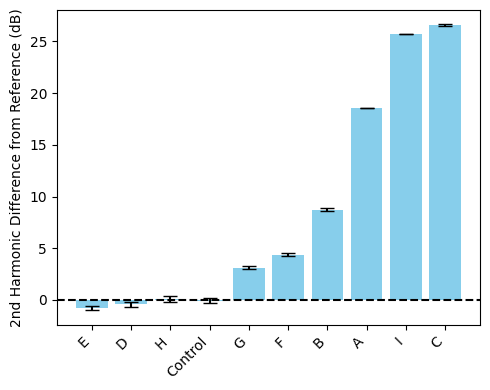

In [456]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data
target_labels = loaded_data['target_labels']
diff_values = loaded_data['diff_values']
diff_errs = loaded_data['diff_errs']

# Create the bar plot
plt.figure(figsize=(5, 4))
x_pos = np.arange(len(diff_values))
plt.bar(x_pos, diff_values, yerr=diff_errs, capsize=5, color='skyblue')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at 0
plt.xticks(x_pos, target_labels, rotation=45, ha='right')  # Rotate x-axis labels
plt.ylabel('2nd Harmonic Difference from Reference (dB)')
#plt.title('Target 2nd Harmonic Power at 20cm')
plt.tight_layout()
plt.show()


In [150]:
diff_values[3] = diff_values[2]

# Antenna characteristics - Power heatmap

Measuring initial noise floor at reference harmonic frequency...
Initial noise floor: -97.00 dBm, RL set to: -7.00 dBm
Starting measurement sweep for second harmonic...
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -20.0 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -19.3 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -18.6 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -17.8 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -17.1 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -16.4 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -15.7 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -15.0 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -14.2 dBm
Measuring at Fundamental Freq: 2.000 GHz (Harmonic: 4.000 GHz), Power: -13.5 dBm
Measuring at Fundamen

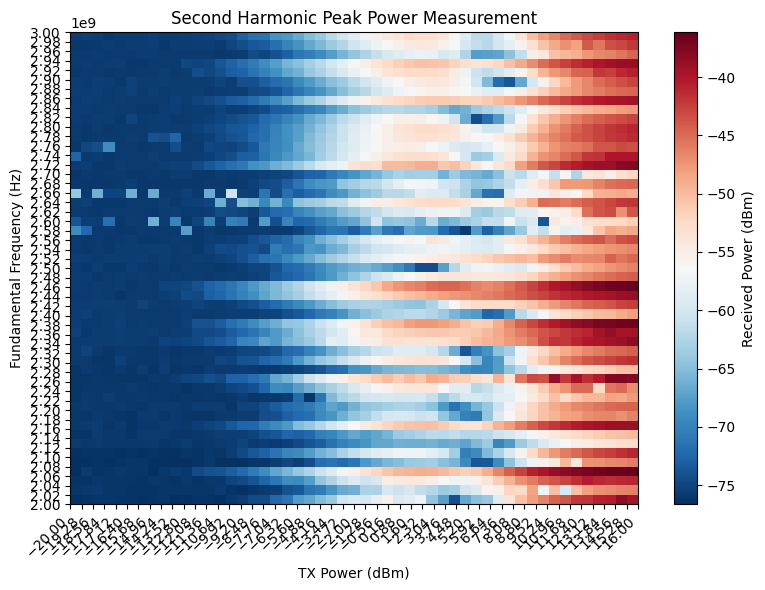

In [89]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

#############################
# User Configurable Parameters
#############################

# Fundamental Frequency sweep parameters (in GHz)
start_freq = 2.0
stop_freq = 3.0
num_freq_points = 51  # Adjust as needed

# TX Power sweep parameters (in dBm)
start_power = -20
stop_power = 16
num_power_points = 51   # Adjust as needed

# Measurement parameters
sweep_time = 50   # ms
log_scale = 10    # dB per division
noise_floor_offset = 90  # dB above noise floor for RL
span = 0.04  # GHz total span for measurement around the second harmonic frequency

# Instrument Resource Identifiers (replace with your actual IDs)
analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

#############################
# Instrument Initialization
#############################

def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')  # Preset and set to power trace mode (adjust as needed)
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

#############################
# Measurement Functions
#############################

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    """
    Measures the noise floor around a given frequency.
    """
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')
    analyzer.write('SNGLS;TS')
    # Wait for sweep completion
    time.sleep((sweep_time_ms / 10000.0) )

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor

def set_reference_level(analyzer, reference_level, log_scale=10):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

def perform_single_measurement(analyzer, generator, fundamental_freq, power_level, sweep_time_ms=50, span=0.04):
    """
    Performs a single measurement at a given fundamental frequency and power level.
    Assumes reference level has already been set.

    Instead of measuring at the fundamental frequency, we measure the peak at the second harmonic.
    """
    # Set generator fundamental frequency and power
    generator.write(f'FREQ {fundamental_freq}GHZ')
    generator.write(f'POW {power_level}DBM')
    generator.write('OUTP ON')
    time.sleep(0.1)

    # Calculate second harmonic frequency
    harmonic_freq = 2 * fundamental_freq

    # Measure the final spectrum around the second harmonic
    analyzer.write(f'FA {harmonic_freq - span/2}GHZ')
    analyzer.write(f'FB {harmonic_freq + span/2}GHZ')
    analyzer.write('RB 1MHZ')
    analyzer.write('VB 10KHZ')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms/10000.0) )
    
    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))

    # Turn off generator output after measurement
    generator.write('OUTP OFF')

    # Find peak power in the measured trace (second harmonic)
    peak_power = np.max(trace_values)
    return peak_power

#############################
# Main Procedure
#############################

if __name__ == "__main__":
    # Initialize instruments
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    # Create arrays for fundamental frequency and TX power
    freq_points = np.linspace(start_freq, stop_freq, num_freq_points)
    power_points = np.linspace(start_power, stop_power, num_power_points)

    # Prepare a 2D array to store received power at the second harmonic
    received_power = np.zeros((num_freq_points, num_power_points))

    # Measure noise floor once at a representative frequency (e.g., midpoint of fundamental freq range)
    ref_freq = (start_freq + stop_freq) / 2.0
    # Use second harmonic of ref_freq for noise floor measurement
    harmonic_ref_freq = 2 * ref_freq
    
    print("Measuring initial noise floor at reference harmonic frequency...")
    initial_noise_floor = measure_noise_floor(analyzer, harmonic_ref_freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time)
    reference_level = initial_noise_floor + noise_floor_offset
    set_reference_level(analyzer, reference_level, log_scale=log_scale)
    print(f"Initial noise floor: {initial_noise_floor:.2f} dBm, RL set to: {reference_level:.2f} dBm")

    print("Starting measurement sweep for second harmonic...")
    for i, f in enumerate(freq_points):
        for j, p in enumerate(power_points):
            print(f"Measuring at Fundamental Freq: {f:.3f} GHz (Harmonic: {2*f:.3f} GHz), Power: {p:.1f} dBm")
            peak_power = perform_single_measurement(analyzer, generator, f, p, sweep_time_ms=sweep_time, span=span)
            received_power[i, j] = peak_power

    print("Sweep complete. Closing instruments.")
    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()

    #############################
    # Plot the Results
    #############################
    # Convert fundamental frequency points to Hz for labeling
    freqs_hz = freq_points * 1e9

    fig, ax = plt.subplots(figsize=(8, 6))
    # Plot as an image with discrete ticks
    extent = (power_points[0], power_points[-1], freqs_hz[0], freqs_hz[-1])
    img = ax.imshow(received_power,
                    origin='lower',
                    aspect='auto',
                    extent=extent,
                    cmap='RdBu_r')

    ax.set_xticks(power_points)
    ax.set_yticks(freqs_hz)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    cbar = fig.colorbar(img, ax=ax, label='Received Power (dBm)')

    ax.set_xlabel("TX Power (dBm)")
    ax.set_ylabel("Fundamental Frequency (Hz)")
    plt.title("Second Harmonic Peak Power Measurement")
    plt.tight_layout()
    plt.show()


## Save and load file

In [90]:
 #############################
# Save the Results
#############################
import os 

save_power_heatmap = False

# Filename to save data
save_filename = "second_harmonic_data_without_target.npz"

if (save_power_heatmap == True):
    # Save data to an NPZ file
    np.savez(save_filename, freq_points=freq_points, power_points=power_points, received_power=received_power)
    print(f"Data saved to {os.path.abspath(save_filename)}")

Data saved to C:\Users\mkm\PycharmProjects\pythonProject\second_harmonic_data_without_target.npz


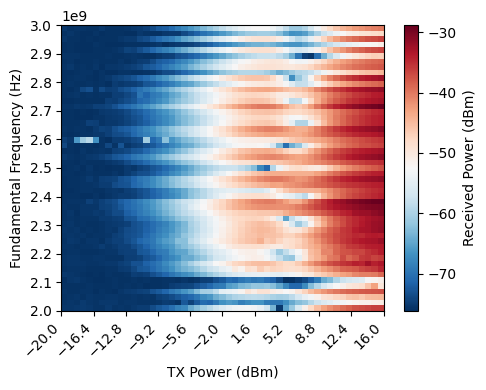

In [415]:
import numpy as np
import matplotlib.pyplot as plt

# Filename to load data from
load_filename = "second_harmonic_data.npz"

# Load the data
data = np.load(load_filename)
freq_points_test = data['freq_points']
power_points_test = data['power_points']
received_power_test = data['received_power']

# Convert fundamental frequency points to Hz for labeling
freqs_hz = freq_points_test * 1e9

# Plot the Results
fig, ax = plt.subplots(figsize=(5, 4))
extent = (power_points_test[0], power_points_test[-1], freqs_hz[0], freqs_hz[-1])
img = ax.imshow(received_power_test,
                origin='lower',
                aspect='auto',
                extent=extent,
                cmap='RdBu_r')

ax.set_xticks(power_points_test[::5])
ax.set_yticks(freqs_hz[::5])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

cbar = fig.colorbar(img, ax=ax, label='Received Power (dBm)')

ax.set_xlabel("TX Power (dBm)")
ax.set_ylabel("Fundamental Frequency (Hz)")
#plt.title("Second Harmonic Peak Power Measurement")
plt.tight_layout()
# Remove all grid lines
ax.grid(False)
plt.show()


## Plot the differnce with and without target

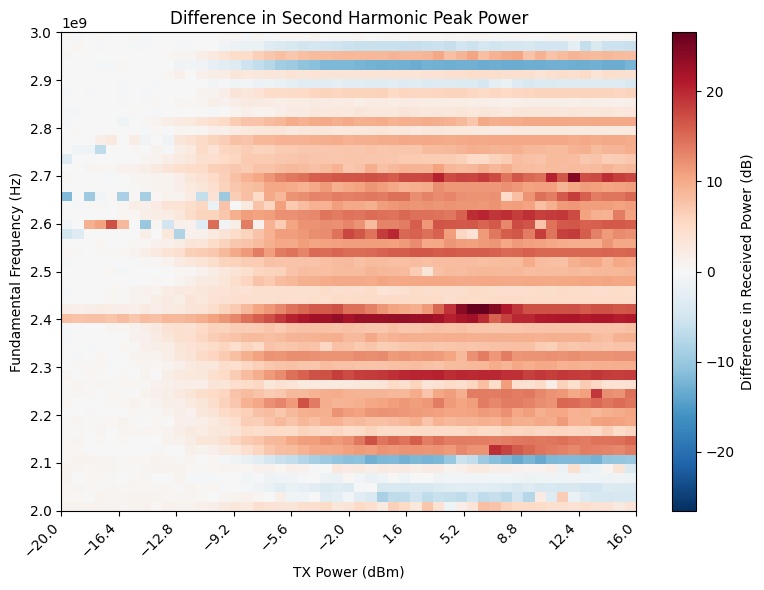

In [370]:
import numpy as np
import matplotlib.pyplot as plt

# Filenames for the two data files
file_without_target = "second_harmonic_data_without_target - Copy.npz"
file_with_target = "second_harmonic_data.npz"

# Load the data without target
data_without = np.load(file_without_target)
freq_points_without = data_without['freq_points']
power_points_without = data_without['power_points']
received_power_without = data_without['received_power']

# Load the data with target
data_with = np.load(file_with_target)
freq_points_with = data_with['freq_points']
power_points_with = data_with['power_points']
received_power_with = data_with['received_power']

# Verify that the frequency and power arrays are the same
if not (np.array_equal(freq_points_without, freq_points_with) and np.array_equal(power_points_without, power_points_with)):
    raise ValueError("The frequency or power grids do not match between the two datasets.")

# Compute the difference
difference = received_power_with - received_power_without

# Convert fundamental frequency points to Hz for labeling (if desired)
freqs_hz = freq_points_without * 1e9

# Determine symmetric color limits around zero
diff_min = difference.min()
diff_max = difference.max()
abs_max = max(abs(diff_min), abs(diff_max))

# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(8, 6))
# Remove all grid lines
ax.grid(False)
# Set the extent for imshow
extent = (power_points_without[0], power_points_without[-1], freqs_hz[0], freqs_hz[-1])

img = ax.imshow(difference,
                origin='lower',
                aspect='auto',
                extent=extent,
                cmap='RdBu_r',
                vmin=-abs_max,     # Force symmetrical range around zero
                vmax=abs_max)

# Set the ticks to match measurement points
# Replace `power_points_test` with the appropriate variable holding your power points if needed
ax.set_xticks(power_points_without[::5])
ax.set_yticks(freqs_hz[::5])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add a colorbar to show difference scale
cbar = fig.colorbar(img, ax=ax, label='Difference in Received Power (dB)')

ax.set_xlabel("TX Power (dBm)")
ax.set_ylabel("Fundamental Frequency (Hz)")
plt.title("Difference in Second Harmonic Peak Power")
plt.tight_layout()
plt.show()



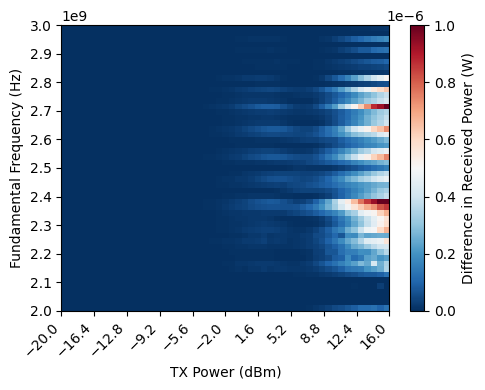

In [468]:
import numpy as np
import matplotlib.pyplot as plt

# Filenames for the two data files
file_without_target = "second_harmonic_data_without_target - Copy.npz"
file_with_target = "second_harmonic_data.npz"

# Load the data without target
data_without = np.load(file_without_target)
freq_points_without = data_without['freq_points']
power_points_without = data_without['power_points']
received_power_without_dBm = data_without['received_power']  # in dBm

# Load the data with target
data_with = np.load(file_with_target)
freq_points_with = data_with['freq_points']
power_points_with = data_with['power_points']
received_power_with_dBm = data_with['received_power']  # in dBm

# Verify that the frequency and power arrays are the same
if not (np.array_equal(freq_points_without, freq_points_with) and 
        np.array_equal(power_points_without, power_points_with)):
    raise ValueError("The frequency or power grids do not match between the two datasets.")

# --------------------------
# 1) Convert from dBm to W
# --------------------------
#    P[dBm] -> P[W] = 10^((P[dBm] - 30) / 10)
received_power_with_W = 10 ** ((received_power_with_dBm - 30) / 10.0)
received_power_without_W = 10 ** ((received_power_without_dBm - 30) / 10.0)

# --------------------------
# 2) Compute the difference in Watts
# --------------------------
difference_in_watts = received_power_with_W - received_power_without_W

# Convert fundamental frequency points to Hz for labeling (if desired)
freqs_hz = freq_points_without * 1e9

# --------------------------
# Adjust the colormap scale
# --------------------------
mid_value = 0.2e-6  # Set the desired midpoint (e.g., 1 µW)
diff_min = difference_in_watts.min()
diff_max = difference_in_watts.max()

# Adjust vmin and vmax to center around the new midpoint
vmin = 0#mid_value - (diff_max - mid_value)
vmax = 1e-6 #mid_value + (mid_value - diff_min)

# Plot the difference heatmap in Watts
fig, ax = plt.subplots(figsize=(5, 4))
# Remove all grid lines
ax.grid(False)

# Set the extent for imshow:
#  (left, right, bottom, top) in the same units as the axis data
extent = (power_points_without[0], power_points_without[-1],
          freqs_hz[0], freqs_hz[-1])

img = ax.imshow(difference_in_watts,
                origin='lower',
                aspect='auto',
                extent=extent,
                cmap='RdBu_r',
                vmin=vmin,   # Adjusted range
                vmax=vmax)

# Set the ticks to match measurement points
ax.set_xticks(power_points_without[::5])
ax.set_yticks(freqs_hz[::5])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add a colorbar to show the scale in Watts
cbar = fig.colorbar(img, ax=ax, label='Difference in Received Power (W)')


ax.set_xlabel("TX Power (dBm)")
ax.set_ylabel("Fundamental Frequency (Hz)")
plt.tight_layout()
plt.show()


# Plot one target over distance

In [80]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time

#############################
# User Configurable Parameters
#############################

fundamental_freq = 2.4  # GHz
harmonic_multiplier = 2
power_level = 16  # dBm
sweep_time = 50   # ms
log_scale = 10    # dB per division
noise_floor_offset = 90  # dB above the noise floor for RL
span = 0.04  # GHz total span around the harmonic frequency

num_measurements_per_distance = 5  # How many times we measure per distance

analyzer_id = 'GPIB0::1::INSTR'  # Replace with your analyzer address
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'  # Replace with your generator address

harmonic_freq = fundamental_freq * harmonic_multiplier

def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')
    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms/1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor

def set_reference_level(analyzer, reference_level, log_scale=10):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

def prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=50, noise_floor_offset=90):
    """
    Measure noise floor and set reference level once for the current distance.
    This should be done once per distance before taking multiple measurements.
    """
    initial_noise_floor = measure_noise_floor(analyzer, harmonic_freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time_ms)
    reference_level = initial_noise_floor + noise_floor_offset
    set_reference_level(analyzer, reference_level, log_scale=log_scale)
    return reference_level

def perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=50, span=0.04):
    """
    Performs a single measurement of the final spectrum and returns the peak power.
    Assumes reference level has already been set for this distance.
    """
    # Set generator
    generator.write(f'FREQ {fundamental_freq}GHZ')
    generator.write(f'POW {power_level}DBM')
    generator.write('OUTP ON')
    time.sleep(0.1)

    # Measure final spectrum (no noise floor measurement here)
    analyzer.write(f'FA {harmonic_freq - span/2}GHZ')
    analyzer.write(f'FB {harmonic_freq + span/2}GHZ')
    analyzer.write('RB 1MHZ')
    analyzer.write('VB 10KHZ')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms/1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))

    # Turn off generator after measurement
    generator.write('OUTP OFF')

    peak_power = np.max(trace_values)
    return peak_power

if __name__ == "__main__":
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    device_name = input("Enter the device name: ").strip()
    if device_name == '':
        device_name = "Unknown_Device"

    start_distance_str = input("Enter start distance (e.g. in meters): ").strip()
    increment_str = input("Enter distance increment per step: ").strip()

    try:
        start_distance = float(start_distance_str)
        distance_increment = float(increment_str)
    except ValueError:
        print("Invalid distance or increment. Please enter numeric values.")
        # Close instruments and exit
        analyzer.close()
        analyzer_rm.close()
        generator.close()
        exit(1)

    # First: Control measurement with no target
    input("Remove the target and press Enter to perform the control measurement...")

    # Measure noise floor and set RL once for the control configuration
    prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

    # Perform multiple measurements with no target (control)
    control_peak_powers = []
    for i in range(num_measurements_per_distance):
        peak_power = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=sweep_time, span=span)
        control_peak_powers.append(peak_power)
        print(f"Control measurement {i+1}/{num_measurements_per_distance}: {peak_power:.2f} dBm")

    reference_mean = np.mean(control_peak_powers)
    reference_std = np.std(control_peak_powers)
    print(f"Reference mean peak: {reference_mean:.2f} dBm, std: {reference_std:.2f} dB\n")

    distances = []
    mean_peaks = []
    std_peaks = []
    current_distance = start_distance

    # Loop until user aborts
    while True:
        user_input = input(f"Place target at {current_distance:.2f} m and press Enter to measure, or type 'abort' to finish: ").strip().lower()
        if user_input == 'abort':
            break

        # Measure noise floor and set RL once at this distance
        prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

        # Perform multiple measurements at this distance (with target)
        peak_powers = []
        for i in range(num_measurements_per_distance):
            peak_power = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=sweep_time, span=span)
            peak_powers.append(peak_power)
            print(f"Measurement {i+1}/{num_measurements_per_distance} at {current_distance:.2f} m: {peak_power:.2f} dBm")

        mean_peak = np.mean(peak_powers)
        std_peak = np.std(peak_powers)

        # Compute difference from reference
        diff_from_reference = mean_peak - reference_mean

        distances.append(current_distance)
        mean_peaks.append(diff_from_reference)
        std_peaks.append(std_peak)

        print(f"Distance {current_distance:.2f} m - Mean Peak Diff from Reference: {diff_from_reference:.2f} dB (Std: {std_peak:.2f} dB)\n")

        # Increment distance for next measurement
        current_distance += distance_increment

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()
    
# Define the save file name using the device name
save_filename = f"{device_name}_data.npz"

# Save the data arrays
np.savez(save_filename, distances=distances, mean_peaks=mean_peaks, std_peaks=std_peaks)

Control measurement 1/5: -52.66 dBm
Control measurement 2/5: -52.83 dBm
Control measurement 3/5: -52.66 dBm
Control measurement 4/5: -52.83 dBm
Control measurement 5/5: -52.49 dBm
Reference mean peak: -52.69 dBm, std: 0.13 dB
Measurement 1/5 at 0.00 m: -27.82 dBm
Measurement 2/5 at 0.00 m: -27.82 dBm
Measurement 3/5 at 0.00 m: -27.82 dBm
Measurement 4/5 at 0.00 m: -27.82 dBm
Measurement 5/5 at 0.00 m: -27.82 dBm
Distance 0.00 m - Mean Peak Diff from Reference: 24.87 dB (Std: 0.00 dB)
Measurement 1/5 at 0.02 m: -33.99 dBm
Measurement 2/5 at 0.02 m: -33.99 dBm
Measurement 3/5 at 0.02 m: -33.99 dBm
Measurement 4/5 at 0.02 m: -33.99 dBm
Measurement 5/5 at 0.02 m: -34.16 dBm
Distance 0.02 m - Mean Peak Diff from Reference: 18.67 dB (Std: 0.07 dB)
Measurement 1/5 at 0.04 m: -35.98 dBm
Measurement 2/5 at 0.04 m: -35.98 dBm
Measurement 3/5 at 0.04 m: -35.98 dBm
Measurement 4/5 at 0.04 m: -35.98 dBm
Measurement 5/5 at 0.04 m: -35.98 dBm
Distance 0.04 m - Mean Peak Diff from Reference: 16.71 dB 

In [96]:
# Load the saved data
loaded_data = np.load("Multimeter_data.npz")
distances = loaded_data['distances']
mean_peaks = loaded_data['mean_peaks']
std_peaks = loaded_data['std_peaks']

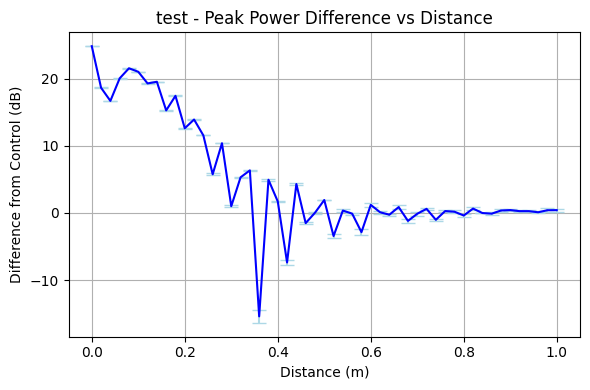

In [97]:

# Plot results
distances = np.array(distances)
mean_peaks = np.array(mean_peaks)  # These are differences from reference
std_peaks = np.array(std_peaks)

plt.figure(figsize=(6, 4))
plt.errorbar(distances, mean_peaks, yerr=std_peaks, fmt='-', capsize=5, color='blue', ecolor='lightblue')
plt.xlabel("Distance (m)")
plt.ylabel("Difference from Control (dB)")
plt.title(f"{device_name} - Peak Power Difference vs Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


# For zoomed range

In [39]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
import os

#############################
# User Configurable Parameters
#############################

fundamental_freq = 2.4  # GHz
harmonic_multiplier = 1
power_level = 16  # dBm
sweep_time = 50  # ms
log_scale = 10  # dB per division
noise_floor_offset = 90  # dB above the noise floor for RL
span = 0.04  # GHz total span around the harmonic frequency

num_measurements_per_distance = 5  # How many times we measure per distance

analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

harmonic_freq = fundamental_freq * harmonic_multiplier


def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm


def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator


def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')
    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms / 1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor


def set_reference_level(analyzer, reference_level, log_scale=10):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')


def prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=100, noise_floor_offset=90):
    """
    Measure noise floor and set reference level once for the current distance.
    """
    initial_noise_floor = measure_noise_floor(analyzer, harmonic_freq, rbw='10KHZ', vbw='1KHZ',
                                              sweep_time_ms=sweep_time_ms)
    reference_level = initial_noise_floor + noise_floor_offset
    set_reference_level(analyzer, reference_level, log_scale=log_scale)
    return reference_level


def perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level, sweep_time_ms=50,
                               span=0.04):
    """
    Performs a single measurement of the final spectrum and returns the peak power.
    Assumes reference level has already been set for this distance.
    """
    # Set generator
    generator.write(f'FREQ {fundamental_freq}GHZ')
    generator.write(f'POW {power_level}DBM')
    generator.write('OUTP ON')
    time.sleep(0.1)

    # Measure final spectrum (no noise floor measurement here)
    analyzer.write(f'FA {harmonic_freq - span / 2}GHZ')
    analyzer.write(f'FB {harmonic_freq + span / 2}GHZ')
    analyzer.write('RB 1MHZ')
    analyzer.write('VB 10KHZ')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms / 1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    peak_power = np.max(trace_values)

    # Turn off generator after measurement
    generator.write('OUTP OFF')

    return peak_power


if __name__ == "__main__":
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    device_name = input("Enter the device name: ").strip()
    if device_name == '':
        device_name = "Unknown_Device"

    start_distance_str = input("Enter start distance (e.g. in meters): ").strip()
    increment_str = input("Enter distance increment per step: ").strip()

    try:
        start_distance = float(start_distance_str)
        distance_increment = float(increment_str)
    except ValueError:
        print("Invalid distance or increment. Please enter numeric values.")
        analyzer.close()
        analyzer_rm.close()
        generator.close()
        exit(1)

    # Control measurement with no target
    input("Remove the target and press Enter to perform the control measurement...")

    # Measure noise floor and set RL once for control
    prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=sweep_time,
                                     noise_floor_offset=noise_floor_offset)

    # Perform multiple measurements with no target (control)
    control_peak_powers = []
    for i in range(num_measurements_per_distance):
        peak_power = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level,
                                                sweep_time_ms=sweep_time, span=span)
        control_peak_powers.append(peak_power)
        print(f"Control measurement {i + 1}/{num_measurements_per_distance}: {peak_power:.2f} dBm")

    reference_mean = np.mean(control_peak_powers)
    reference_std = np.std(control_peak_powers)
    print(f"Reference mean peak: {reference_mean:.2f} dBm, std: {reference_std:.2f} dB\n")

    distances = []
    # We'll store all individual differences (from reference) in a 2D list
    # shape: (# of distances) x (num_measurements_per_distance)
    all_diff_from_ref = []
    current_distance = start_distance

    while True:
        user_input = input(
            f"Place target at {current_distance:.5f} m and press Enter to measure, or type 'abort' to finish: ").strip().lower()
        if user_input == 'abort':
            break

        # Measure noise floor and set RL once at this distance
        prepare_measurement_for_distance(analyzer, harmonic_freq, sweep_time_ms=sweep_time,
                                         noise_floor_offset=noise_floor_offset)

        # Perform multiple measurements at this distance (with target)
        peak_powers = []
        for i in range(num_measurements_per_distance):
            peak_power = perform_single_measurement(analyzer, generator, fundamental_freq, harmonic_freq, power_level,
                                                    sweep_time_ms=sweep_time, span=span)
            peak_powers.append(peak_power)
            print(
                f"Measurement {i + 1}/{num_measurements_per_distance} at {current_distance:.2f} m: {peak_power:.2f} dBm")

        # Compute differences from reference for each measurement
        diffs = np.array(peak_powers) - reference_mean
        all_diff_from_ref.append(diffs)

        distances.append(current_distance)
        mean_peak = np.mean(diffs)
        std_peak = np.std(diffs)

        print(
            f"Distance {current_distance:.4f} m - Mean Peak Diff from Reference: {mean_peak:.2f} dB (Std: {std_peak:.2f} dB)\n")

        current_distance += distance_increment

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()

    # Convert to arrays
    distances = np.array(distances)
    all_diff_from_ref = np.array(all_diff_from_ref)  # shape: (num_distances, num_measurements_per_distance)

    # Save data
    data_filename = f"{device_name}_data.npz"
    np.savez(data_filename, distances=distances, all_diff_from_ref=all_diff_from_ref)
    print(f"Data saved to {data_filename}")


Control measurement 1/5: -39.83 dBm
Control measurement 2/5: -39.50 dBm
Control measurement 3/5: -40.16 dBm
Control measurement 4/5: -40.16 dBm
Control measurement 5/5: -40.00 dBm
Reference mean peak: -39.93 dBm, std: 0.25 dB
Measurement 1/5 at 0.00 m: -28.00 dBm
Measurement 2/5 at 0.00 m: -27.83 dBm
Measurement 3/5 at 0.00 m: -28.00 dBm
Measurement 4/5 at 0.00 m: -28.33 dBm
Measurement 5/5 at 0.00 m: -28.16 dBm
Distance 0.0000 m - Mean Peak Diff from Reference: 11.87 dB (Std: 0.17 dB)
Measurement 1/5 at 0.02 m: -31.83 dBm
Measurement 2/5 at 0.02 m: -31.50 dBm
Measurement 3/5 at 0.02 m: -31.33 dBm
Measurement 4/5 at 0.02 m: -31.66 dBm
Measurement 5/5 at 0.02 m: -31.50 dBm
Distance 0.0200 m - Mean Peak Diff from Reference: 8.37 dB (Std: 0.17 dB)
Measurement 1/5 at 0.04 m: -32.66 dBm
Measurement 2/5 at 0.04 m: -32.83 dBm
Measurement 3/5 at 0.04 m: -32.66 dBm
Measurement 4/5 at 0.04 m: -32.66 dBm
Measurement 5/5 at 0.04 m: -32.66 dBm
Distance 0.0400 m - Mean Peak Diff from Reference: 7.24

In [130]:
# Load data
loaded_data = np.load("Oscilloscope_40-50cm_0.25cm_data.npz")
distances = loaded_data['distances']
all_diff_from_ref = loaded_data['all_diff_from_ref']  # shape: (num_distances, num_measurements_per_distance)

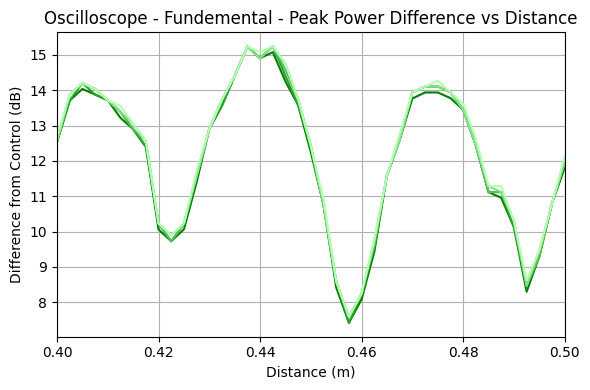

In [131]:
# Compute mean and std from the raw measurements
mean_peaks = np.mean(all_diff_from_ref, axis=1)
std_peaks = np.std(all_diff_from_ref, axis=1)

# Sort each row to get the lines
sorted_diffs = np.sort(all_diff_from_ref, axis=1) 
num_sweeps = sorted_diffs.shape[1]

# Create a green gradient from dark green to light green for line plots
green_start = np.array([0, 0.5, 0])
green_end = np.array([0.7, 1, 0.7])
greens = [green_start + (green_end - green_start)*i/(num_sweeps-1) for i in range(num_sweeps)]


###############################################################################
# Sorted line plots (lowest to highest measurement per distance)
###############################################################################
plt.figure(figsize=(6, 4))
for i in range(num_sweeps):
    line_data = sorted_diffs[:, i]
    plt.plot(distances, line_data, color=greens[i], label=f"Line {i+1}")
plt.xlabel("Distance (m)")
plt.ylabel("Difference from Control (dB)")
plt.title(f"{device_name} - Peak Power Difference vs Distance")
plt.grid(True)
#plt.ylim(-5, 5)
plt.xlim(distances[0], distances[-1])
plt.tight_layout()


plt.show()

# Nonlinearity demonstration 

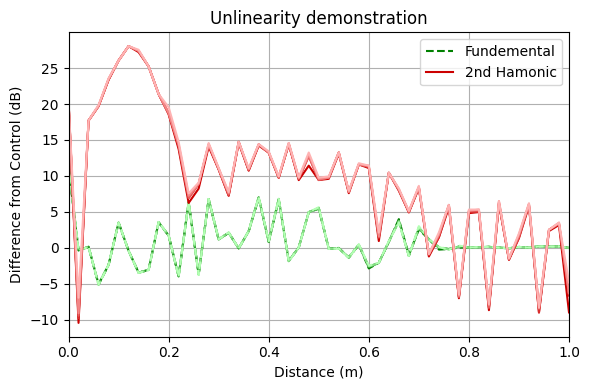

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Load the first dataset (to be scaled)
loaded_data1 = np.load("Oscilloscope - Fundemental_data.npz")
distances = loaded_data1['distances']
all_diff_from_ref = loaded_data1['all_diff_from_ref']  # shape: (num_distances, num_measurements_per_distance)

# Load the second dataset (unscaled)
loaded_data2 = np.load("Oscilloscope_data.npz")
distances2 = loaded_data2['distances']
all_diff_from_ref2 = loaded_data2['all_diff_from_ref']  # shape: (num_distances, num_measurements_per_distance)

# Ensure the distances match or handle if they differ
if not np.array_equal(distances, distances2):
    raise ValueError("Distances arrays from the two datasets do not match. Please align them or handle accordingly.")

# Compute sorted data for the first dataset
sorted_diffs1 = np.sort(all_diff_from_ref, axis=1) 
num_sweeps1 = sorted_diffs1.shape[1]

# Compute sorted data for the second dataset
sorted_diffs2 = np.sort(all_diff_from_ref2, axis=1) 
num_sweeps2 = sorted_diffs2.shape[1]

# Create a green gradient for the first dataset (scaled)
green_start = np.array([0, 0.5, 0])
green_end = np.array([0.7, 1, 0.7])
greens = [green_start + (green_end - green_start)*i/(num_sweeps1-1) for i in range(num_sweeps1)]

# Create a red gradient for the second dataset (unscaled)
red_start = np.array([0.8, 0, 0])
red_end = np.array([1, 0.7, 0.7])
reds = [red_start + (red_end - red_start)*i/(num_sweeps2-1) for i in range(num_sweeps2)]

# Generate a random scale factor for each distance for the first dataset
scale_factors = np.random.uniform(-0.5, 1, size=len(distances))

# Plotting
plt.figure(figsize=(6, 4))

# Plot the scaled dataset (first file)
for i in range(num_sweeps1):
    line_data = sorted_diffs1[:, i]
    line_data_scaled = line_data * scale_factors
    if i == 0:
        plt.plot(distances, line_data_scaled, color=greens[i], linestyle='--', label="Fundemental")
    else:
        plt.plot(distances, line_data_scaled, color=greens[i], linestyle='--')

# Plot the unscaled dataset (second file)
for i in range(num_sweeps2):
    line_data2 = sorted_diffs2[:, i]
    if i == 0:
        plt.plot(distances, line_data2, color=reds[i], label="2nd Hamonic")
    else:
        plt.plot(distances, line_data2, color=reds[i])

plt.xlabel("Distance (m)")
plt.ylabel("Difference from Control (dB)")
plt.title("Unlinearity demonstration")
plt.grid(True)
plt.xlim(distances[0], distances[-1])
plt.legend()
plt.tight_layout()
plt.show()


# Standing wave measured vs. simulated

Second Harmonic Frequency: 4.80 GHz
Wavelength at 4.8 GHz: 0.0625 meters
Half-Wavelength (Interference Period): 0.0312 meters


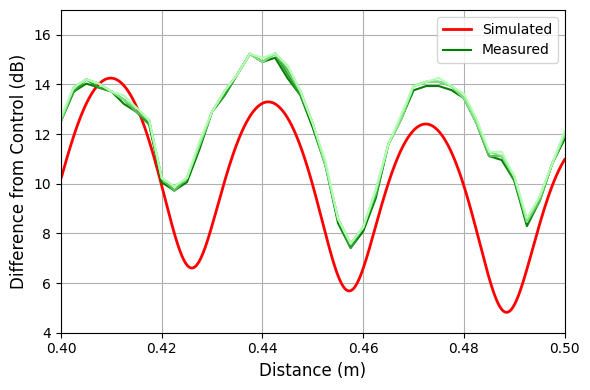

In [476]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================
# 1. Simulation Parameters
# ===========================

# Constants
c = 3e8  # Speed of light (m/s)
f0 = 2.4e9  # Fundamental frequency (Hz)
fh = 2 * f0  # Second harmonic frequency (Hz)

lambda_h = c / fh  # Wavelength at harmonic frequency (m)
lambda_half = lambda_h / 2  # Half-wavelength (m)

print(f'Second Harmonic Frequency: {fh/1e9:.2f} GHz')
print(f'Wavelength at {fh/1e9:.1f} GHz: {lambda_h:.4f} meters')
print(f'Half-Wavelength (Interference Period): {lambda_half:.4f} meters')

# Distance Range
d_min = 0.01  # Minimum distance (m) to avoid division by zero
d_max = 1.0   # Maximum distance (m)
num_points = 10000  # Number of points for smooth curve
d = np.linspace(d_min, d_max, num_points)  # Distance vector (m)

# Path Loss Calculation
P_r_path_loss = 1 / (d**2)  # Inverse square law

# Interference Pattern
m = 0.5  # Modulation index (0 < m <= 1)
phi = -0.8   # Phase shift (radians)
interference = 1 + m * np.cos(2 * np.pi * d / lambda_half + phi)

# Combined Received Power
P_r_total = P_r_path_loss * interference

# Convert to Decibels (dB)
P_r_path_loss_dB = 10 * np.log10(P_r_path_loss)
P_r_total_dB = 10 * np.log10(P_r_total)

# ===========================
# 2. Load Measured Data
# ===========================

# Load data
loaded_data = np.load("Oscilloscope_40-50cm_0.25cm_data.npz")
distances_measured = loaded_data['distances']
all_diff_from_ref = loaded_data['all_diff_from_ref']  # shape: (num_distances, num_measurements_per_distance)
# Compute mean and std from the raw measurements
mean_peaks = np.mean(all_diff_from_ref, axis=1)
std_peaks = np.std(all_diff_from_ref, axis=1)

# Sort each row to get the lines
sorted_diffs = np.sort(all_diff_from_ref, axis=1)
num_sweeps = sorted_diffs.shape[1]

# Create a green gradient from dark green to light green for line plots
green_start = np.array([0, 0.5, 0])
green_end = np.array([0.7, 1, 0.7])
greens = [green_start + (green_end - green_start) * i / (num_sweeps - 1) for i in range(num_sweeps)]

# ===========================
# 3. Plotting
# ===========================

# Define zoom range in meters
zoom_start = 0.40  # 40 cm
zoom_end = 0.50    # 50 cm

# Extract zoomed simulation data
idx_zoom_sim = (d >= zoom_start) & (d <= zoom_end)
d_zoom_sim = d[idx_zoom_sim]
P_r_total_dB_zoom = P_r_total_dB[idx_zoom_sim]

# Extract zoomed measured data
idx_zoom_meas = (distances_measured >= zoom_start) & (distances_measured <= zoom_end)
distances_zoom_meas = distances_measured[idx_zoom_meas]
mean_peaks_zoom = mean_peaks[idx_zoom_meas]
std_peaks_zoom = std_peaks[idx_zoom_meas]

# Create the plot
plt.figure(figsize=(6, 4))
plt.grid(True)
plt.xlabel('Distance (m)', fontsize=12)
plt.ylabel('Received Power / Difference (dB)', fontsize=12)

# Plot Simulated Data
plt.plot(d_zoom_sim, P_r_total_dB_zoom * 1.5, 'r-', linewidth=2, label='Simulated')

for i in range(num_sweeps):
    if i == 0:
        line_data = sorted_diffs[:, i]
        plt.plot(distances_measured, line_data, color=greens[i], label="Measured")
    else:
        line_data = sorted_diffs[:, i]
        plt.plot(distances_measured, line_data, color=greens[i])

# Optional: Change y-axis limits
y_min, y_max = 4, 17  # Adjust these values as needed
plt.ylim(y_min, y_max)

plt.xlabel("Distance (m)")
plt.ylabel("Difference from Control (dB)")
plt.grid(True)

# Add legend
plt.legend(loc='upper right')

# Set zoom limits
plt.xlim(zoom_start, zoom_end)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Plot all distance messurements

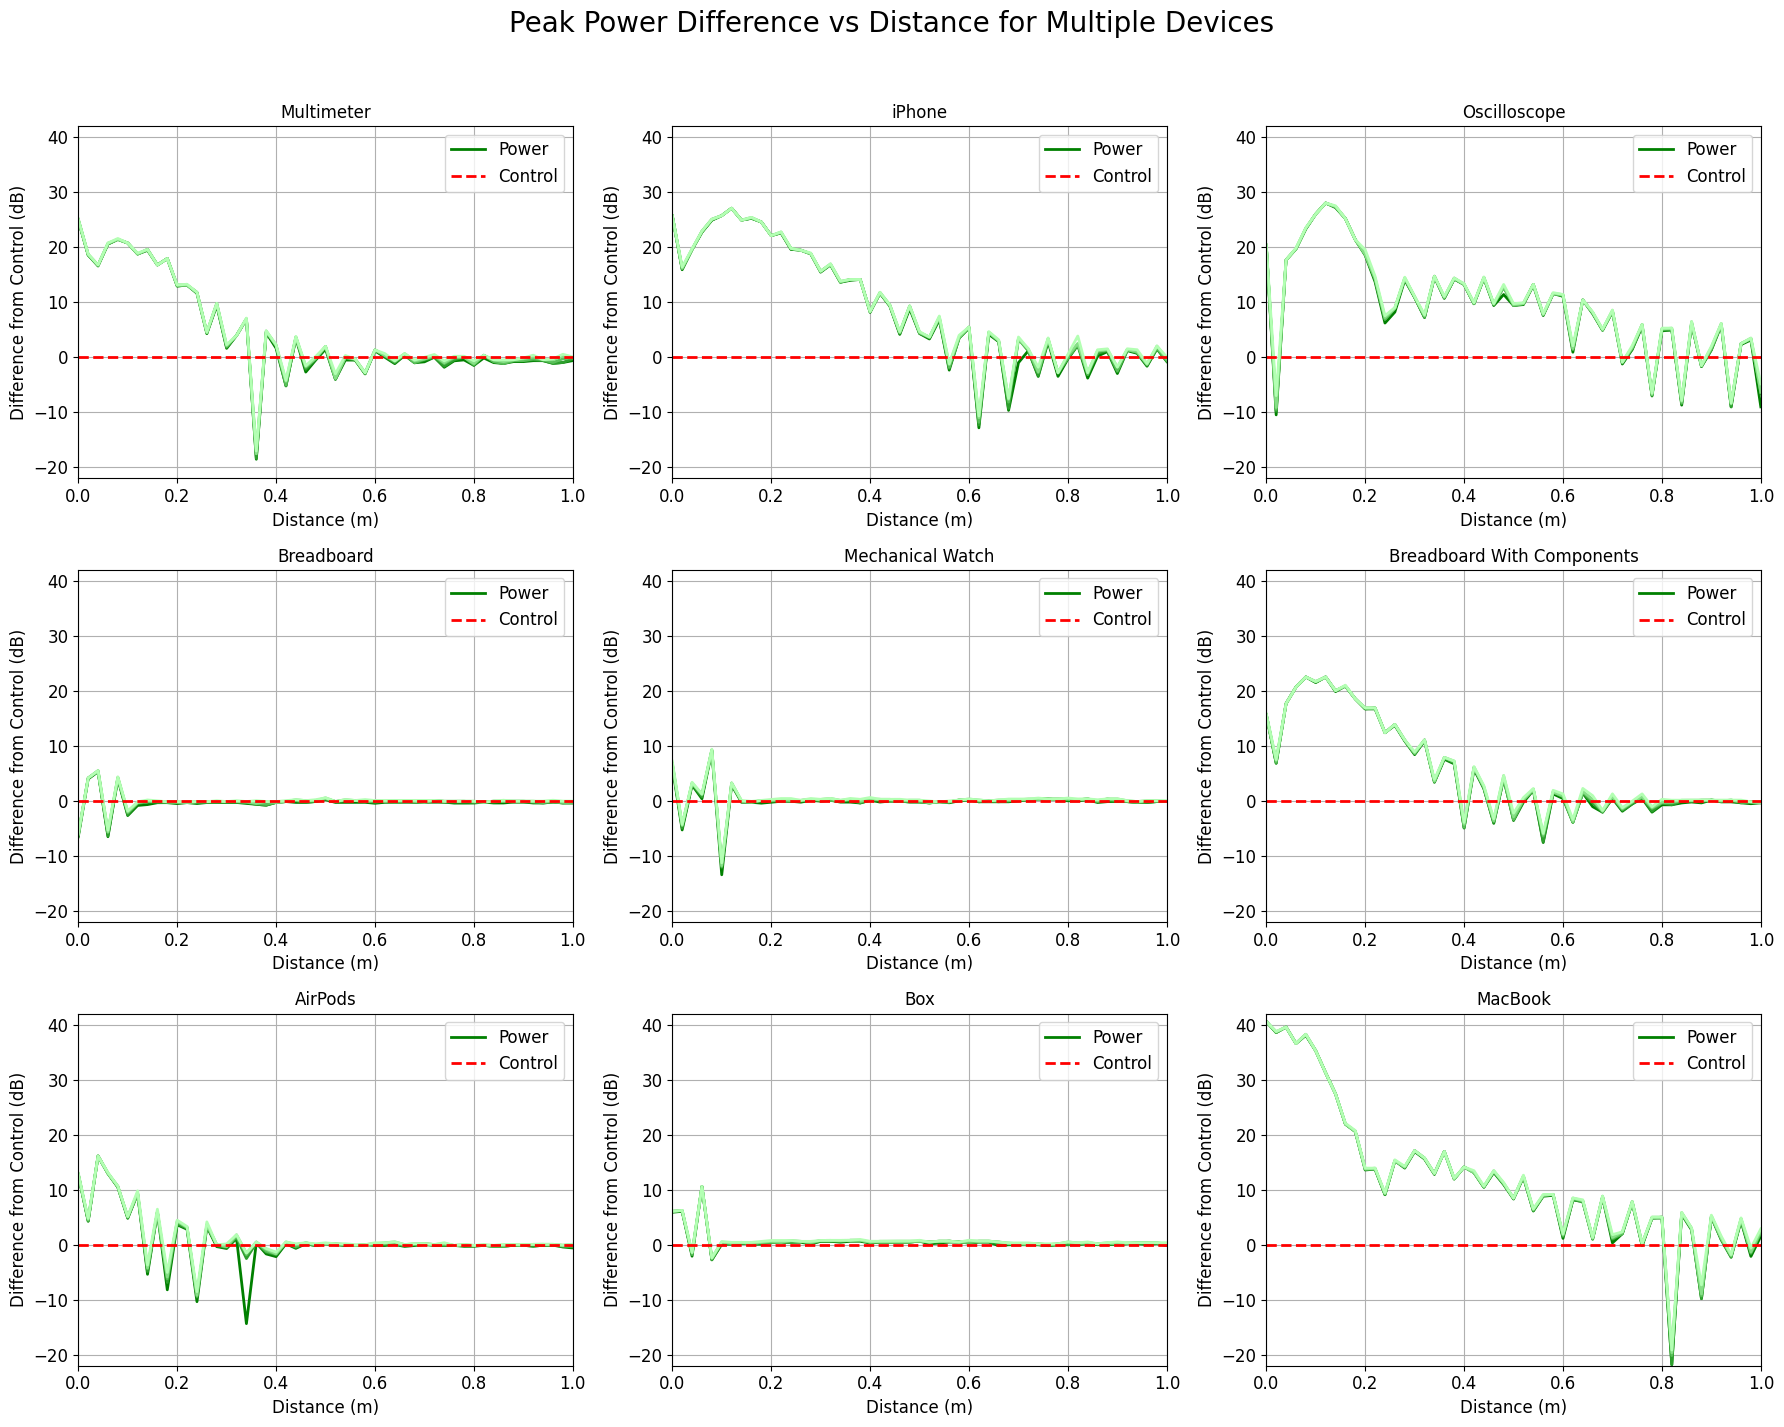

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# User Configuration Section
# ============================

# List of 9 file names to load. Replace these with your actual file names.
file_names = [
    "Multimeter_data.npz",
    "iPhone_data.npz",
    "Oscilloscope_data.npz",
    "Breadboard_data.npz",
    "Mechanical Watch_data.npz",
    "Breadboard (Components)_data.npz",
    "AirPods_data.npz",
    "Box_data.npz",
    "Macbook_data.npz"
]

# List of 9 subtitles for each subplot. Replace these with your desired subtitles.
subtitles = [
    "Multimeter",
    "iPhone",
    "Oscilloscope",
    "Breadboard",
    "Mechanical Watch",
    "Breadboard With Components",
    "AirPods",
    "Box",
    "MacBook"
]

# Main title for the entire figure
main_title = "Peak Power Difference vs Distance for Multiple Devices"

# ============================
# Plotting Section
# ============================

# Ensure that there are exactly 9 file names and subtitles
assert len(file_names) == 9, "There must be exactly 9 file names."
assert len(subtitles) == 9, "There must be exactly 9 subtitles."

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Iterate over each file and its corresponding subplot
for idx, (file_name, subtitle) in enumerate(zip(file_names, subtitles)):
    ax = axes_flat[idx]
    
    # -------------------------
    # Load Data
    # -------------------------
    try:
        loaded_data = np.load(file_name)
        distances = loaded_data['distances']
        all_diff_from_ref = loaded_data['all_diff_from_ref']  # Expected shape: (num_distances, num_measurements_per_distance)
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping this subplot.")
        ax.set_visible(False)  # Hide the subplot if file is not found
        continue
    except KeyError as e:
        print(f"Key {e} not found in {file_name}. Skipping this subplot.")
        ax.set_visible(False)
        continue

    # -------------------------
    # Compute Statistics
    # -------------------------
    mean_peaks = np.mean(all_diff_from_ref, axis=1)
    std_peaks = np.std(all_diff_from_ref, axis=1)
    
    # Sort each row to get the lines
    sorted_diffs = np.sort(all_diff_from_ref, axis=1)  # Shape: (num_distances, num_measurements_per_distance)
    num_sweeps = sorted_diffs.shape[1]
    
    # -------------------------
    # Create Green Gradient
    # -------------------------
    green_start = np.array([0, 0.5, 0])      # Dark green
    green_end = np.array([0.7, 1, 0.7])      # Light green
    if num_sweeps > 1:
        greens = [green_start + (green_end - green_start) * i / (num_sweeps - 1) for i in range(num_sweeps)]
    else:
        greens = [green_start]  # Single sweep
    
    # -------------------------
    # Plot Each Sweep
    # -------------------------
    for i in range(num_sweeps):
        line_data = sorted_diffs[:, i]
        if i == 0:
            # Label only the first sweep to represent "power" in the legend
            ax.plot(distances, line_data, color=greens[i], label="Power")
        else:
            # For other sweeps, no label to avoid duplicate legend entries
            ax.plot(distances, line_data, color=greens[i], label="_nolegend_")
    
    # -------------------------
    # Plot Control Line
    # -------------------------
    ax.axhline(y=0, color='red', linestyle='--', label="Control")
    
    # -------------------------
    # Customize Subplot
    # -------------------------
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Difference from Control (dB)")
    ax.set_title(subtitle, fontsize=12)
    ax.grid(True)
    ax.set_xlim(distances[0], distances[-1])
    ax.set_ylim(-22, 42)
    
    # Add Legend
    ax.legend(loc='upper right')

# -----------------------------
# Finalize the Figure Layout
# -----------------------------

# Set the main title
fig.suptitle(main_title, fontsize=20, y=0.95)

# Adjust layout to prevent overlap and make space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Optionally, save the figure to a file
# plt.savefig("combined_multimeter_plots.png", dpi=300)

# Display the plot
plt.show()


## Targets over distance heatmap

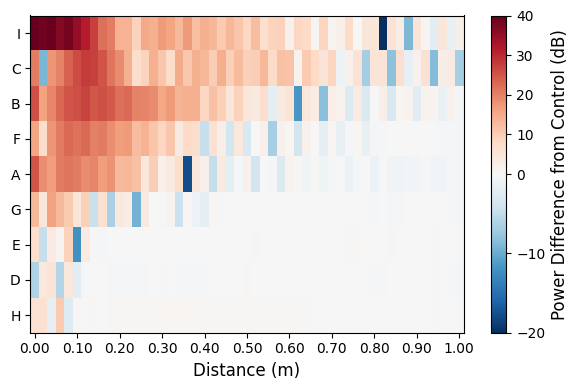

In [465]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# ============================
# User Configuration Section
# ============================

file_names = [
    "Macbook_data.npz",
    "Oscilloscope_data.npz",
    "iPhone_data.npz",
    "Breadboard (Components)_data.npz",
    "Multimeter_data.npz",
    "AirPods_data.npz",
    "Mechanical Watch_data.npz",
    "Breadboard_data.npz",
    "Box_data.npz"
]

subtitles = [
    "I",
    "C",
    "B",
    "F",
    "A",
    "G",
    "E",
    "D",
    "H"
   
]

main_title = "Average Power Difference Heatmap (0 to 1m)"

# ============================
# Data Loading & Processing
# ============================

assert len(file_names) == 9, "There must be exactly 9 file names."
assert len(subtitles) == 9, "There must be exactly 9 subtitles."

device_data = []
valid_devices = []
distances_reference = None

for file_name, device_name in zip(file_names, subtitles):
    try:
        loaded_data = np.load(file_name)
        distances = loaded_data['distances']
        all_diff_from_ref = loaded_data['all_diff_from_ref']  # shape: (num_distances, num_measurements_per_distance)

        # Compute mean differences for each distance
        mean_peaks = np.mean(all_diff_from_ref, axis=1)

        # Store the mean values
        device_data.append(mean_peaks)
        valid_devices.append(device_name)

        # Keep track of distances (assuming all devices have the same distance array)
        if distances_reference is None:
            distances_reference = distances

    except (FileNotFoundError, KeyError) as e:
        # If file not found or key missing, skip this device
        print(f"Skipping {file_name} due to error: {e}")
        continue

device_data = np.array(device_data)  # shape: (num_devices, num_distances)

# If for some reason no data loaded, exit
if device_data.size == 0:
    print("No data loaded. Cannot plot heatmap.")
    exit()

# ============================
# Plotting the Heatmap
# ============================

fig, ax = plt.subplots(figsize=(6, 4))  # Increased width for better label accommodation

# Determine the range of the data for normalization
data_min = np.min(device_data)
data_max = np.max(device_data)

# Set desired min/max limits for dB range (adjust as needed)
vmin = -20   # Example minimum expected difference
vmax = 40    # Example maximum expected difference
vcenter = 0  # Center at 0 dB difference

# Create a two-slope normalization so that 0 is the center of the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Use a diverging colormap like 'RdBu' to emphasize positive/negative differences
im = ax.imshow(device_data, aspect='auto', cmap='RdBu_r', origin='upper', norm=norm)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Power Difference from Control (dB)", fontsize=12)

# Set x-axis ticks and labels
num_distances = len(distances_reference)
num_ticks = 11
x_tick_positions = np.linspace(0, num_distances - 1, num_ticks)
x_tick_labels = [f"{distances_reference[int(i)]:.2f}" for i in x_tick_positions]
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels, fontsize=10)

# Set y-axis to device names
ax.set_yticks(np.arange(len(valid_devices)))
ax.set_yticklabels(valid_devices, fontsize=10)

# Rotate y-axis labels for better readability
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')

# Set axis labels
ax.set_xlabel("Distance (m)", fontsize=12)

# Set title
#ax.set_title(main_title, fontsize=16, pad=20)

# Remove all grid lines
ax.grid(False)

# Adjust layout to accommodate rotated labels
plt.tight_layout()
plt.show()


# ML Classification Model

In [478]:
import pyvisa
import numpy as np
import time
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [480]:

#############################
# User Configurable Parameters
#############################
fundamental_freq = 2.4  # GHz
power_level = 16  # dBm
sweep_time = 50  # ms
log_scale = 10   # dB per division
noise_floor_offset = 90
harmonics_to_measure = [2, 3, 4, 5, 6]  # measure these harmonics
span = 0.04  # GHz
num_measurements_per_device = 10  # how many total measurements per device
fixed_distance = 0.2  # meters

analyzer_id = 'GPIB0::1::INSTR'
generator_id = 'USB0::0x0957::0x1F01::MY48180281::INSTR'

device_names = [
    "Multimeter",
    "iPhone",
    "Oscilloscope",
    "Breadboard",
    "Mechanical_Watch",
    "Breadboard_Components",
    "AirPods",
    "Box",
    "Macbook"
]


def initialize_analyzer(instrument_id):
    rm = pyvisa.ResourceManager()
    analyzer = rm.open_resource(instrument_id)
    analyzer.write('IP;TDF P')
    return analyzer, rm

def initialize_generator(instrument_id):
    rm = pyvisa.ResourceManager()
    generator = rm.open_resource(instrument_id)
    return generator

def measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=50):
    analyzer.write(f'FA {freq - 0.02}GHZ')
    analyzer.write(f'FB {freq + 0.02}GHZ')
    analyzer.write(f'RB {rbw}')
    analyzer.write(f'VB {vbw}')
    analyzer.write(f'ST {sweep_time_ms}MS')
    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms / 1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    noise_floor = np.median(trace_values)
    return noise_floor

def set_reference_level(analyzer, reference_level, log_scale=10):
    analyzer.write(f'LG {log_scale}DB')
    analyzer.write(f'RL {reference_level}DBM')

def prepare_for_measurements(analyzer, freq, sweep_time_ms=50, noise_floor_offset=90):
    # Measure noise floor
    initial_noise_floor = measure_noise_floor(analyzer, freq, rbw='10KHZ', vbw='1KHZ', sweep_time_ms=sweep_time_ms)
    reference_level = initial_noise_floor + noise_floor_offset
    set_reference_level(analyzer, reference_level, log_scale=10)
    return reference_level

def measure_harmonic_peak(analyzer, generator, fundamental_freq, harmonic_num, power_level, sweep_time_ms=50, span=0.04):
    harmonic_freq = fundamental_freq * harmonic_num
    # Set generator
    generator.write(f'FREQ {fundamental_freq}GHZ')
    generator.write(f'POW {power_level}DBM')
    generator.write('OUTP ON')
    time.sleep(0.1)

    # Measure final spectrum at harmonic
    analyzer.write(f'FA {harmonic_freq - span / 2}GHZ')
    analyzer.write(f'FB {harmonic_freq + span / 2}GHZ')
    analyzer.write('RB 1MHZ')
    analyzer.write('VB 10KHZ')
    analyzer.write(f'ST {sweep_time_ms}MS')

    analyzer.write('SNGLS;TS')
    time.sleep((sweep_time_ms / 1000.0) + 0.1)

    trace_data = analyzer.query('TRA?')
    trace_values = np.array(list(map(float, trace_data.split(','))))
    peak_power = np.max(trace_values)

    # Turn off generator
    generator.write('OUTP OFF')
    return peak_power

In [0]:

if __name__ == "__main__":
    analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
    generator = initialize_generator(generator_id)

    input("Remove any target (clear path) and press Enter to measure the control (no target) harmonic peaks.")

    # Prepare reference level for fundamental frequency
    _ = prepare_for_measurements(analyzer, fundamental_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

    # Measure the control (no target) harmonic peaks multiple times for averaging
    control_measurements = []
    num_control_measurements = 5  # how many times to measure control to get a stable reference
    for i in range(num_control_measurements):
        control_powers = []
        for h in harmonics_to_measure:
            power = measure_harmonic_peak(analyzer, generator, fundamental_freq, h, power_level, sweep_time_ms=sweep_time, span=span)
            control_powers.append(power)
        control_measurements.append(control_powers)
        print(f"Control measurement {i+1}/{num_control_measurements}: {control_powers}")

    control_measurements = np.array(control_measurements)
    control_mean = np.mean(control_measurements, axis=0)  # mean for each harmonic

    print(f"Control mean harmonic powers: {control_mean}")

    # We'll gather data from all devices relative to control
    all_data = []
    all_labels = []

    # Instead of measuring each device multiple times in a row,
    # we do a round-robin approach:
    # For each round, measure each device once, then repeat until we have num_measurements_per_device times.
    
    for round_idx in range(num_measurements_per_device):
        print(f"\n--- Starting measurement round {round_idx+1}/{num_measurements_per_device} ---")
        for device_idx, dev_name in enumerate(device_names):
            input(f"Place the {dev_name} at {fixed_distance} m and press Enter to continue...")

            # Re-check noise floor and RL if needed
            _ = prepare_for_measurements(analyzer, fundamental_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

            # Measure device once this round
            device_powers = []
            for h in harmonics_to_measure:
                power = measure_harmonic_peak(analyzer, generator, fundamental_freq, h, power_level, sweep_time_ms=sweep_time, span=span)
                device_powers.append(power)

            # Compute difference from control
            diff_from_control = np.array(device_powers) - control_mean
            all_data.append(diff_from_control)
            all_labels.append(device_idx)
            print(f"{dev_name} round {round_idx+1}: {device_powers}, diff: {diff_from_control}")

    # Close instruments
    analyzer.close()
    analyzer_rm.close()
    generator.close()

    all_data = np.array(all_data)
    all_labels = np.array(all_labels)
    print("Data collection complete.")

In [63]:
# Save data
np.savez("harmonic_data.npz", X=all_data, y=all_labels, device_names=device_names, control_mean=control_mean)
print("Data saved to harmonic_data.npz")

# Train the model
X = all_data
y = all_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Save model
joblib.dump(clf, "harmonic_model.pkl")
print("Model saved to harmonic_model.pkl")



Control measurement 1/5: [np.float64(-53.5), np.float64(-69.33), np.float64(-41.33), np.float64(-59.66), np.float64(-68.66)]
Control measurement 2/5: [np.float64(-53.16), np.float64(-70.0), np.float64(-41.33), np.float64(-59.66), np.float64(-69.0)]
Control measurement 3/5: [np.float64(-53.5), np.float64(-69.66), np.float64(-41.33), np.float64(-59.83), np.float64(-68.66)]
Control measurement 4/5: [np.float64(-53.16), np.float64(-70.16), np.float64(-41.33), np.float64(-59.83), np.float64(-69.33)]
Control measurement 5/5: [np.float64(-53.66), np.float64(-69.66), np.float64(-41.33), np.float64(-59.5), np.float64(-69.33)]
Control mean harmonic powers: [-53.396 -69.762 -41.33  -59.696 -68.996]

--- Starting measurement round 1/10 ---
Multimeter round 1: [np.float64(-39.66), np.float64(-62.99), np.float64(-41.32), np.float64(-59.49), np.float64(-70.16)], diff: [ 1.3736e+01  6.7720e+00  1.0000e-02  2.0600e-01 -1.1640e+00]
iPhone round 1: [np.float64(-58.16), np.float64(-69.49), np.float64(-41.

In [482]:

# Load the model and device names
clf = joblib.load("harmonic_model.pkl")
data = np.load("harmonic_data.npz")
device_names = data['device_names']  # array of device names

analyzer, analyzer_rm = initialize_analyzer(analyzer_id)
generator = initialize_generator(generator_id)

input("Remove any target (clear path) and press Enter to measure control peaks for this session:")

# Prepare reference (do once)
_ = prepare_for_measurements(analyzer, fundamental_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

# Measure control once for the testing session
control_measurements = []
num_control_measurements = 3  # a few measurements to get stable reference
for i in range(num_control_measurements):
    control_powers = []
    for h in harmonics_to_measure:
        power = measure_harmonic_peak(analyzer, generator, fundamental_freq, h, power_level, sweep_time_ms=sweep_time, span=span)
        control_powers.append(power)
    control_measurements.append(control_powers)
    print(f"Test session control measurement {i+1}: {control_powers}")

control_measurements = np.array(control_measurements)
test_control_mean = np.mean(control_measurements, axis=0)
print(f"Test control mean harmonic powers: {test_control_mean}")

# Now enter a loop to test multiple devices without re-measuring control
while True:
    user_input = input("Place the unknown target at the test position and press Enter to measure.\n(Press Enter again with no device to end testing): ").strip()
    if user_input == "abort":
        # If user just presses Enter without placing a device, we exit
        print("Ending testing session.")
        break

    # Prepare again if needed (to ensure consistent analyzer settings)
    _ = prepare_for_measurements(analyzer, fundamental_freq, sweep_time_ms=sweep_time, noise_floor_offset=noise_floor_offset)

    # Measure the unknown target
    test_device_powers = []
    for h in harmonics_to_measure:
        power = measure_harmonic_peak(analyzer, generator, fundamental_freq, h, power_level, sweep_time_ms=sweep_time, span=span)
        test_device_powers.append(power)

    test_device_powers = np.array(test_device_powers)
    diff_from_control = test_device_powers - test_control_mean
    print(f"Unknown device measurement: {test_device_powers}")
    print(f"Difference from test session control: {diff_from_control}")

    # Predict
    prediction = clf.predict([diff_from_control])[0]
    guessed_device = device_names[prediction]
    print(f"The ML model guesses that the device is: {guessed_device}")
    time.sleep(4)

# Close instruments
analyzer.close()
analyzer_rm.close()
generator.close()


Test session control measurement 1: [np.float64(-53.83), np.float64(-67.33), np.float64(-40.33), np.float64(-70.33), np.float64(-71.49)]
Test session control measurement 2: [np.float64(-54.16), np.float64(-67.66), np.float64(-40.33), np.float64(-70.33), np.float64(-71.83)]
Test session control measurement 3: [np.float64(-54.16), np.float64(-67.49), np.float64(-40.83), np.float64(-70.49), np.float64(-71.99)]
Test control mean harmonic powers: [-54.05       -67.49333333 -40.49666667 -70.38333333 -71.77      ]
Unknown device measurement: [-48.32 -67.99 -40.32 -70.82 -71.49]
Difference from test session control: [ 5.73       -0.49666667  0.17666667 -0.43666667  0.28      ]
The ML model guesses that the device is: Breadboard_Components
Unknown device measurement: [-48.48 -68.15 -40.32 -70.98 -71.48]
Difference from test session control: [ 5.57       -0.65666667  0.17666667 -0.59666667  0.29      ]
The ML model guesses that the device is: Breadboard_Components
Unknown device measurement: [-5

KeyboardInterrupt: 

In [423]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split

def load_harmonic_model_and_data(model_file="harmonic_model.pkl", data_file="harmonic_data.npz", test_size=0.2, random_state=42):

    # Load the model
    clf = joblib.load(model_file)

    # Load the data
    data = np.load(data_file)
    X = data['X']
    y = data['y']
    device_names = data['device_names']

    # Split into train and test sets
    _, X_test, _, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print(f"Model loaded from {model_file}")
    print(f"Data loaded from {data_file}")

    return clf, X_test, y_test, device_names


Model loaded from harmonic_model.pkl
Data loaded from harmonic_data.npz
Classification Report:
                        precision    recall  f1-score   support

           Multimeter       1.00      1.00      1.00         3
               iPhone       0.75      1.00      0.86         3
         Oscilloscope       1.00      1.00      1.00         2
           Breadboard       1.00      1.00      1.00         2
     Mechanical_Watch       0.00      0.00      0.00         3
Breadboard_Components       1.00      1.00      1.00         1
              AirPods       0.00      0.00      0.00         0
                  Box       1.00      1.00      1.00         1
              Macbook       1.00      1.00      1.00         3

             accuracy                           0.83        18
            macro avg       0.75      0.78      0.76        18
         weighted avg       0.79      0.83      0.81        18


C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

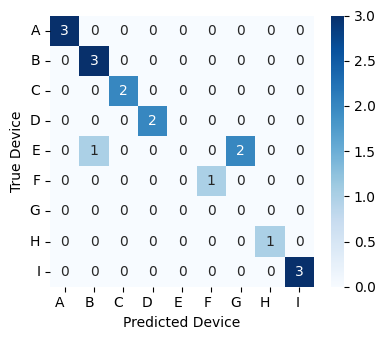

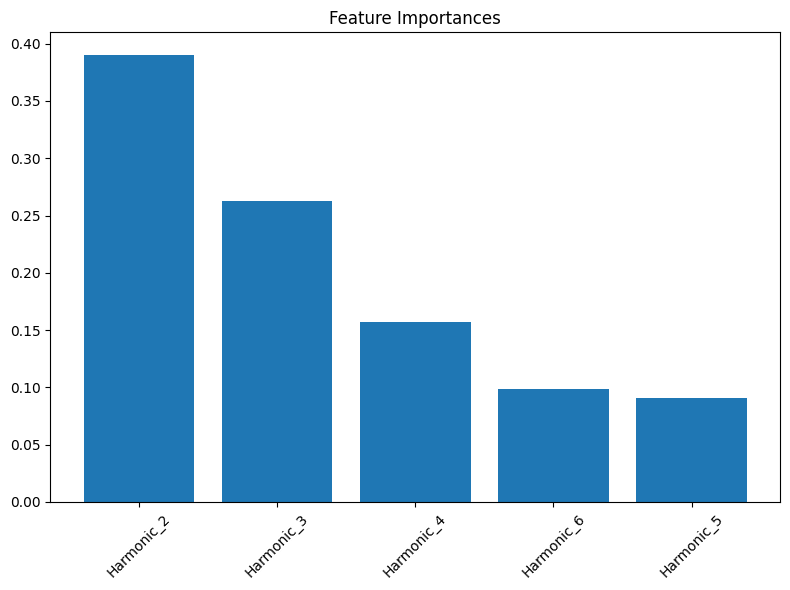

In [445]:
import string
# Load the model and data
clf, X_test, y_test, device_names = load_harmonic_model_and_data()

# Predict using the loaded model
y_pred = clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, target_names=device_names)
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate alphabetical labels
num_classes = len(device_names)  # Assume device_names has the same number of classes as the confusion matrix
alphabet_labels = list(string.ascii_uppercase[:num_classes])  # Use first `num_classes` letters

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4,3.5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=alphabet_labels, yticklabels=alphabet_labels, cmap='Blues')
plt.xlabel("Predicted Device")
plt.ylabel("True Device")

# Tilt the y-axis labels
plt.setp(plt.gca().get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')

plt.setp(plt.gca().get_xticklabels(), rotation=0, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()
# Visualize feature importance if available
if hasattr(clf, "feature_importances_"):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [f'Harmonic_{i+2}' for i in indices], rotation=45)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

In [96]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Assume that harmonic_data.npz has been created previously as in your scenario
data = np.load("harmonic_data.npz")
X = data['X']  # Features
y = data['y']  # Labels
device_names = data['device_names']

# Split into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',   # You could also try 'f1_weighted', 'precision_weighted', etc.
    cv=5,
    n_jobs=-1,            # Use all available CPU cores
    verbose=2
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Print best parameters found by GridSearchCV
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=device_names))

# Print accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the best model: {acc * 100:.2f}%")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found by grid search:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
                       precision    recall  f1-score   support

           Multimeter       1.00      1.00      1.00         3
               iPhone       1.00      1.00      1.00         3
         Oscilloscope       1.00      1.00      1.00         2
           Breadboard       1.00      1.00      1.00         2
     Mechanical_Watch       0.00      0.00      0.00         3
Breadboard_Components       1.00      1.00      1.00         1
              AirPods       0.00      0.00      0.00         0
                  Box       1.00      1.00      1.00         1
              Macbook       1.00      1.00      1.00         3

             accuracy                           0.83        18
            macro avg       0.78      0.78      0.78        18
       

C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mkm\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

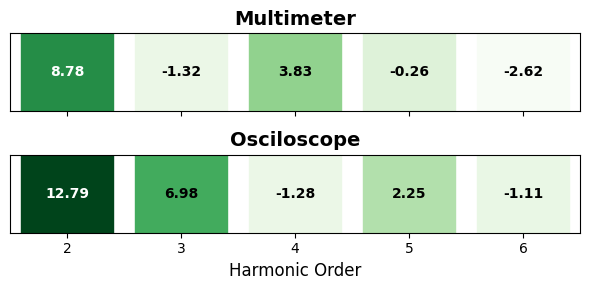

In [188]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib import cm

def plot_barcodes(array1, array2, title1='Barcode 1', title2='Barcode 2'):
    """
    Plots two barcode-like visualizations based on the provided arrays,
    with values displayed inside each stripe and colored with a green gradient.

    Parameters:
    - array1: List or numpy array of 5 floats.
    - array2: List or numpy array of 5 floats.
    - title1: Title for the first barcode.
    - title2: Title for the second barcode.
    """
    if len(array1) != 5 or len(array2) != 5:
        raise ValueError("Both arrays must have exactly 5 elements.")

    # Normalize the arrays to range between 0 and 1 for color mapping
    combined = np.concatenate((array1, array2))
    min_val = np.min(combined)
    max_val = np.max(combined)
    if max_val != min_val:
        norm = lambda x: (x - min_val) / (max_val - min_val)
    else:
        norm = lambda x: 0.5  # Default to middle value if all are equal
    array1_norm = [norm(x) for x in array1]
    array2_norm = [norm(x) for x in array2]

    # Define harmonic orders
    harmonic_orders = [2, 3, 4, 5, 6]
    bar_width = 0.8  # Width of each stripe

    # Choose the 'Greens' colormap
    cmap = matplotlib.colormaps.get_cmap('Greens')

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True)

    # Function to plot a single barcode
    def plot_single_barcode(ax, array_norm, array_values, title):
        for i, (x, val_norm, val) in enumerate(zip(harmonic_orders, array_norm, array_values)):
            color = cmap(val_norm)  # Get color from 'Greens' colormap
            rect = Rectangle((x - bar_width/2, 0), bar_width, 1, color=color)
            ax.add_patch(rect)
            
            # Add text inside the stripe
            # Choose text color based on brightness for better readability
            # Calculate luminance to decide text color
            r, g, b, _ = color  # Get RGBA components
            luminance = 0.299*r + 0.587*g + 0.114*b
            text_color = 'black' if luminance > 0.5 else 'white'
            ax.text(x, 0.5, f"{val:.2f}", ha='center', va='center',
                    color=text_color, fontsize=10, fontweight='bold')
        
        ax.set_xlim(1.5, 6.5)
        ax.set_ylim(0, 1)
        ax.set_yticks([])
        ax.set_title(title, fontsize=14, fontweight='bold')

    # Plot first barcode
    plot_single_barcode(axes[0], array1_norm, array1, title1)

    # Plot second barcode
    plot_single_barcode(axes[1], array2_norm, array2, title2)

    # Set common x-axis
    axes[1].set_xlabel("Harmonic Order", fontsize=12)
    axes[1].set_xticks(harmonic_orders)
    axes[1].set_xticklabels(harmonic_orders)

    # Adjust layout
    plt.tight_layout()
    plt.show()
